In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score

### Load The Datasets
Load both the pca dataset and the one with the original features cleaned and normalized.

Perform a stratified split to tune the parameters on a significative portion of the dataset avoiding incredibly long and unnecessary computing time.

In [2]:
df = pd.read_csv('./cleaned_scaled_dataset.csv',low_memory=False)
df.drop(columns=['SimillarHTTP'],inplace=True)
features = df.columns[:-1]

df_pca = pd.read_csv('./pca_dataset.csv')
pca_features = df_pca.columns[:-1]

X_, X_test, y_train, y_test = train_test_split(
    df[features], # X
    df['label'], # y
    stratify = df['label'], # stratify the dataset based on class labels
    train_size = 0.3, # percentage of training set,
    random_state=10
)

X_pca, X_testpca, y_trainpca, y_testpca = train_test_split(
    df_pca[pca_features], # X
    df_pca['label'], # y
    stratify = df_pca['label'], # stratify the dataset based on class labels
    train_size = 0.3, # percentage of training set,
    random_state=10
)

X_ = X_.reset_index(drop=True)
X_pca = X_pca.reset_index(drop=True)
X_
X_pca
# df_pca
# df


,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_34,component_35,component_36,component_37,component_38,component_39,component_40,component_41,component_42,component_43
0,-3.167734,0.679824,2.248727,-1.417326,-1.891989,0.944640,-0.357488,0.284599,0.034002,-0.865128,...,0.066175,0.032263,0.178596,0.018884,-0.061541,-0.043093,0.014802,0.225228,-0.006587,-0.033773
1,-1.075033,-0.270398,-0.524104,0.425542,1.187720,-0.996104,0.334872,-0.425082,0.316948,0.298888,...,-0.057512,0.022713,-0.031615,0.057894,-0.246388,-0.098488,0.153173,0.049064,0.009108,-0.066552
2,-3.494127,0.715088,2.468786,-1.576161,-2.109138,-0.614575,0.033435,0.126831,0.073705,-0.126247,...,-0.027715,0.030167,-0.171028,-0.041592,0.222759,0.140546,-0.136127,-0.345547,-0.018220,0.093284
3,0.800615,-1.289666,-1.855937,1.936547,2.573678,-0.779214,0.349820,-0.286572,-0.208431,-0.564542,...,0.122682,-0.117066,0.195978,-0.058152,0.327592,0.259338,-0.253255,-0.602004,-0.114118,0.266355
4,-1.358952,0.024834,-0.082072,0.013561,0.622450,-0.864054,0.268818,-0.337548,0.276112,0.223084,...,-0.086534,-0.017395,-0.151705,-0.077591,0.163476,0.002322,-0.074986,0.179785,0.062275,-0.055355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19266,-0.858911,-0.237515,-0.814956,0.589630,1.212688,-0.666436,0.292348,-0.429112,0.346588,0.392609,...,0.064565,0.258162,0.078294,-0.023651,-0.114480,-0.024978,-0.018230,0.116828,0.023606,-0.039954
19267,-3.154961,0.438552,2.177672,-1.198114,-1.772322,-0.135701,-0.109103,0.313073,-0.247247,-0.048507,...,0.056242,0.013168,0.210473,0.107409,-0.350852,-0.115128,0.200275,0.104454,-0.045772,-0.041156
19268,-0.252560,-0.292721,-0.820094,0.684419,1.416304,0.500053,-0.030064,-0.093239,-0.296810,0.237252,...,-0.036182,-0.000753,0.000422,0.053374,-0.024589,0.030859,0.001625,-0.233234,0.020898,0.064790
19269,-0.916677,-0.200073,-0.585870,0.322682,1.346335,-1.073680,0.353009,-0.434005,0.313673,0.268304,...,-0.102053,-0.083235,-0.095156,0.067010,-0.208529,-0.113670,0.167961,0.106658,0.033769,-0.084916


### Define a function to plot the clusters

In [3]:
def plot_clustering(X, labels, centers=None, title="", subplot=None):

    # Plot in given subplot
    if subplot:
        plt.subplot(subplot)
    plt.figure(figsize=(20,15))
    # Plot data with labels as color
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
    # Plot centers if given
    if centers is not None:
        plt.scatter(
            centers[:, 0], centers[:, 1], c="red", s=50, alpha=0.9, label="Centers"
        )

    # Set title
    plt.title(title)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

def plot_clustering_nopca(X, labels, centers=None, title="", subplot=None):

    # Plot in given subplot
    if subplot:
        plt.subplot(subplot)
    plt.figure(figsize=(20,15))
    # Plot data with labels as color
    plt.scatter(X.iloc[:, 1], X.iloc[:, 3], c=labels)
    # Plot centers if given
    if centers is not None:
        plt.scatter(
            centers[:, 1], centers[:, 3], c="red", s=50, alpha=0.9, label="Centers"
        )

    # Set title
    plt.title(title)
    plt.xlabel(X.columns[1])
    plt.ylabel(X.columns[3])


### Kmeans with original features

Tuning ``n_clusters`` parameter based on silhouette and clustering error

In [3]:
kmeans_results = []
for k in range(2, 51):
    kmeans_results.append(KMeans(n_clusters=k, init='random', n_init=10).fit(X_))




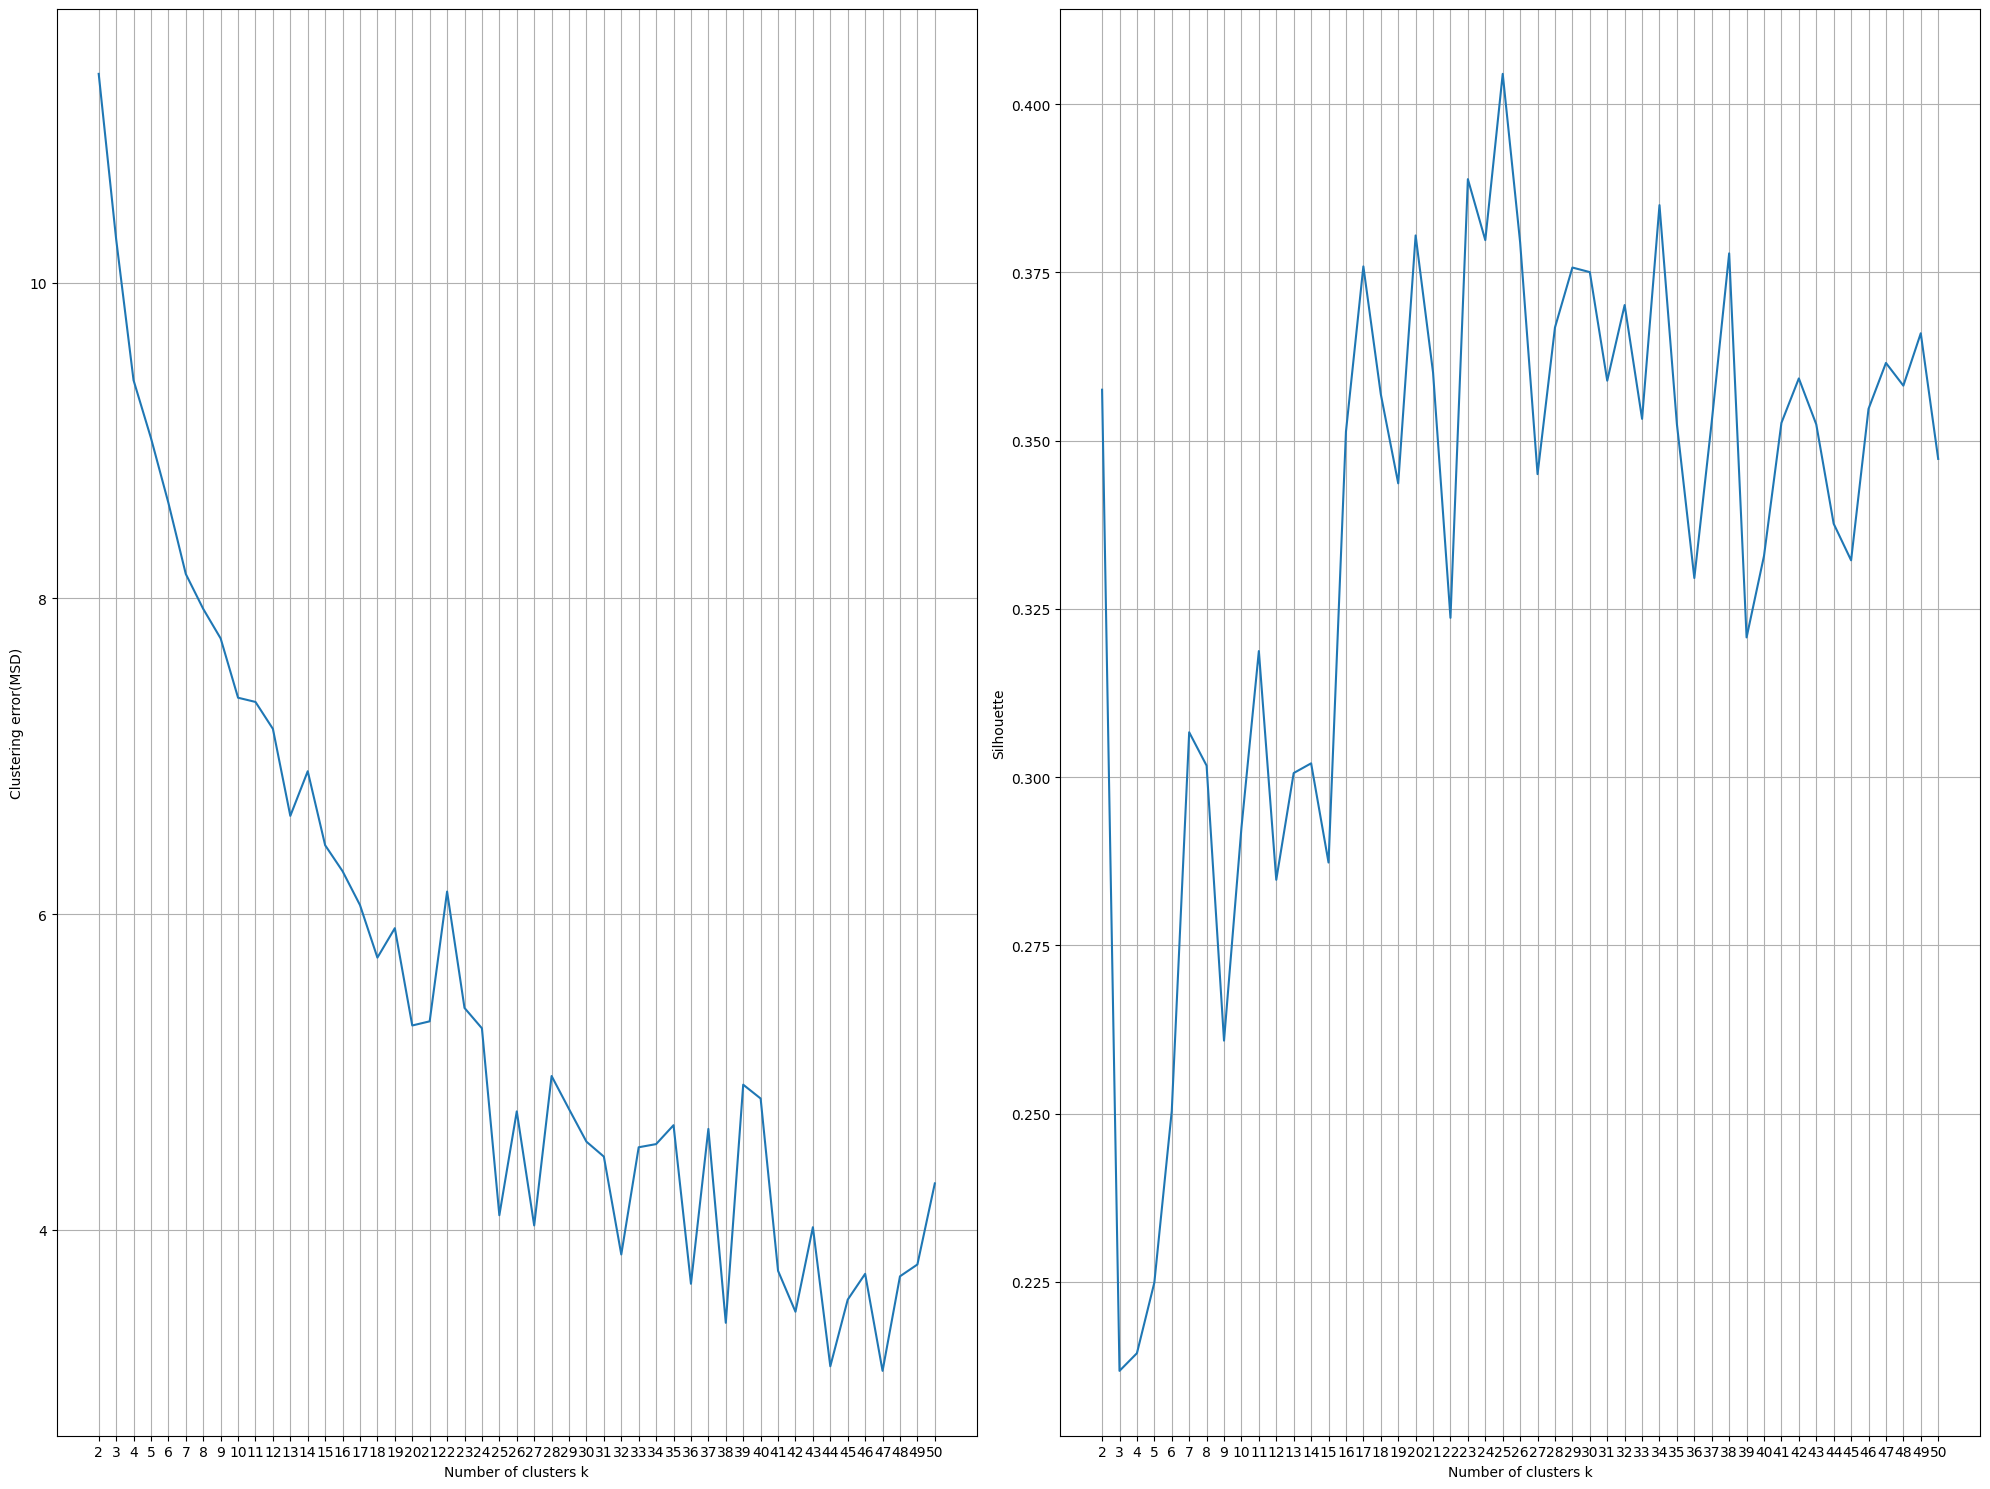

In [4]:
fig, axs = plt.subplots(1,2, figsize=(20, 15))
axs[0].plot(
    [k for k in range(2,51)], 
    [result.inertia_/len(df) for result in kmeans_results]
)
axs[0].set_xlabel("Number of clusters k")
axs[0].set_ylabel("Clustering error(MSD)")
axs[0].set_xticks([k for k in range(2,51)])
axs[0].grid()

axs[1].plot(
    [k for k in range(2,51)], 
    [silhouette_score(X_, result.labels_) for result in kmeans_results]
)

axs[1].set_xticks([k for k in range(2,51)])
axs[1].set_xlabel("Number of clusters k")
axs[1].set_ylabel("Silhouette")
axs[1].grid()

plt.tight_layout()
plt.show()

Performing kmeans with the just found optimal parameter

In [5]:

kmeans = KMeans(n_clusters=25, init='random',n_init=10)
kmeans.fit(df[features])

#Sum of squared distances of samples to their closest cluster center.
print("Sum of squared distances of the samples from their centroid: ", kmeans.inertia_)
# If we divide it by number of sample m, it is the clustering error we have seen in theoretical lectures
print("Mean squared distances of the samples from their centroid: ", kmeans.inertia_/len(df))

# To compute the silhouette, sklearn provides the silhouette_score in the metrics sklearn.metrics library
print("Silhouette score of the samples: ",silhouette_score(df[features], kmeans.labels_))

# To compute the rand index and adjusted rand index sklearn provides the rand_score and adjusted_rand_score functions
rand_score_result = rand_score(df['label'], kmeans.labels_)
adj_rand_score_result = adjusted_rand_score(df['label'], kmeans.labels_)

print("RI between clustering and given classes is ",rand_score_result)
print("ARI between clustering and given classes is ",adj_rand_score_result)





Sum of squared distances of the samples from their centroid:  953776.7791017097
Mean squared distances of the samples from their centroid:  14.847316725069035
Silhouette score of the samples:  0.39619593408003856
RI between clustering and given classes is  0.9094255752183023
ARI between clustering and given classes is  0.3781556839126422


### GMM with original features

Tuning ``n_components`` parameter based on silhouette and log-likelyhood

In [10]:
# GMM

n_cluster_list=[]
shs_list = []
log_l_list=[]
for n_clusters in range(2, 51):
    print(n_clusters)
    gmm = GaussianMixture(n_components=n_clusters,init_params='kmeans')
    cl_labels = gmm.fit_predict(X_)
    silhouette  = silhouette_score(X_, cl_labels)
    n_cluster_list.append(n_clusters)
    shs_list.append(silhouette)
    log_l_list.append(gmm.score(X_))

shs =np.nan_to_num(np.array(shs_list),nan=0)
best_sh= np.max(shs_list)
best_n=n_cluster_list[np.argmax(shs_list)]
print("best k: ",best_n, " with corresponding silhouette: ", best_sh)



2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
best k:  2  with corresponding silhouette:  0.8580044704544476


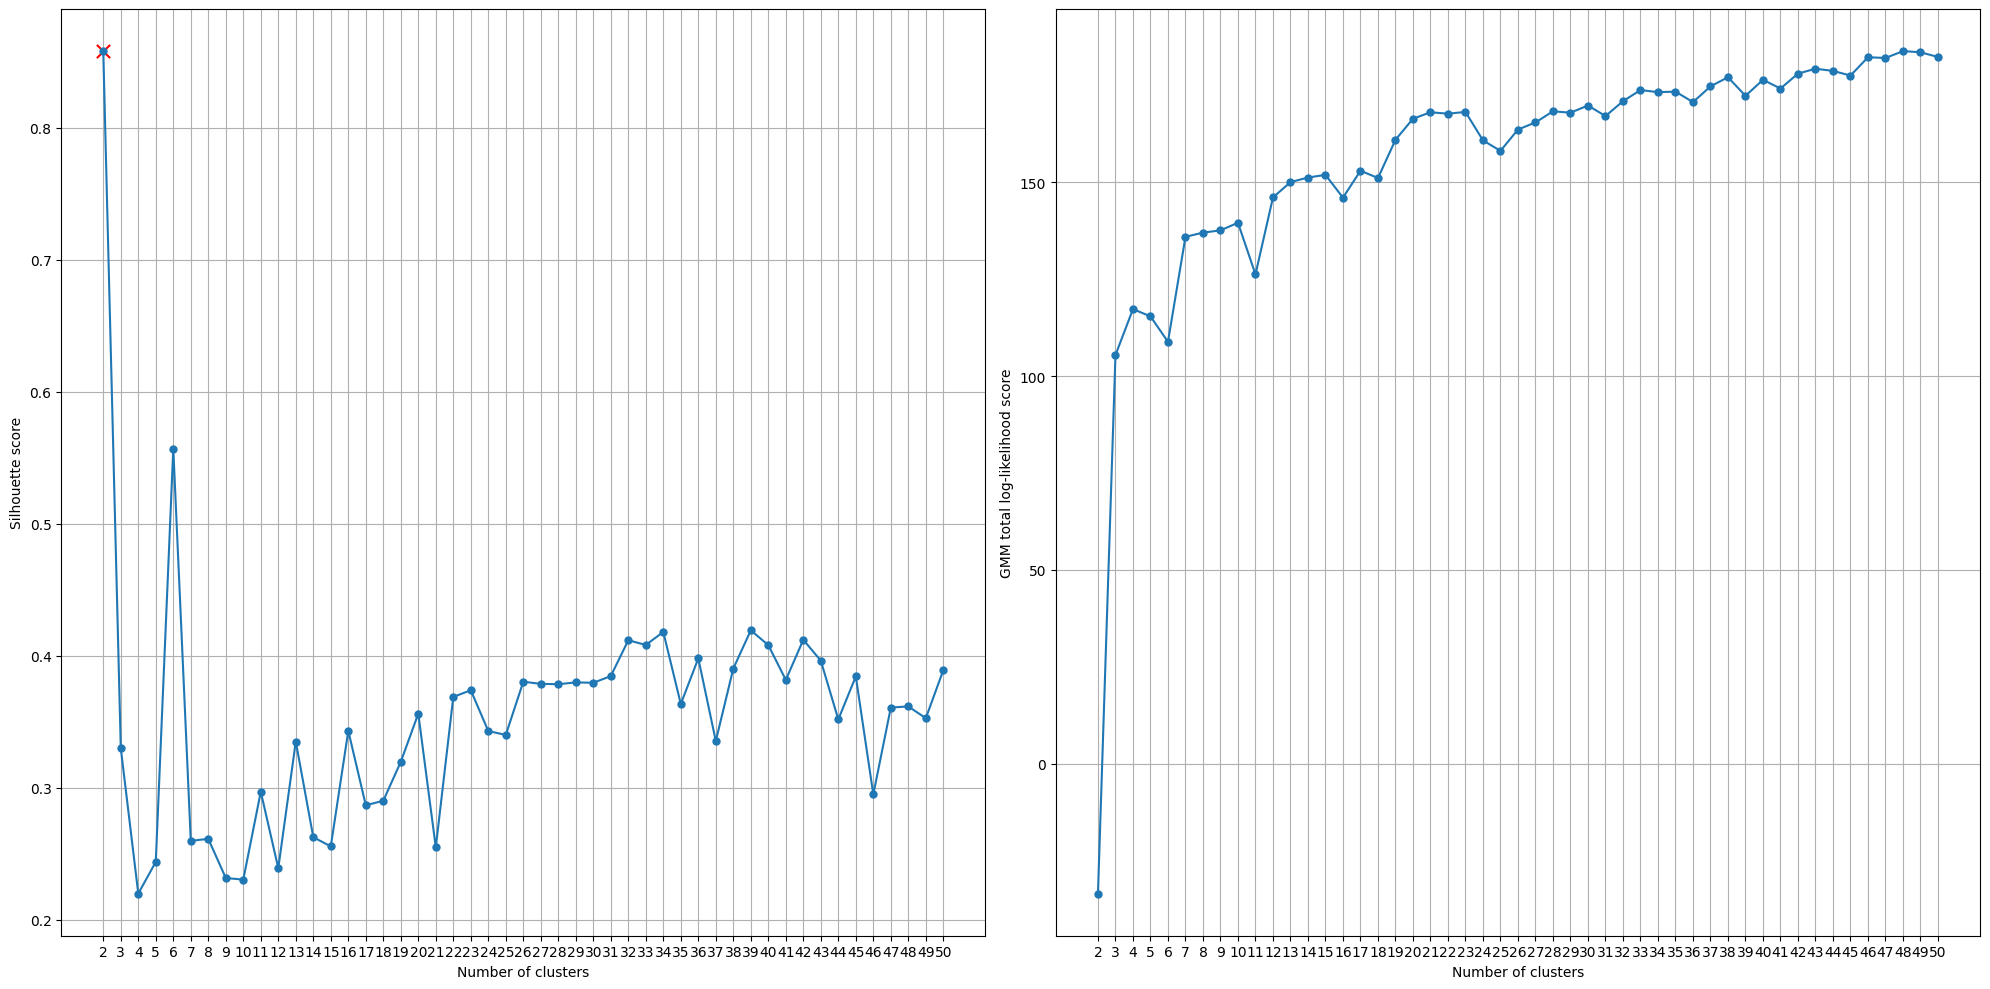

In [11]:
# Plot
fig,ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(n_cluster_list,shs_list, marker='o', markersize=5)
ax[0].scatter(best_n, best_sh, color='r', marker='x', s=90)
ax[0].grid()
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Silhouette score')
ax[0].set_xticks([k for k in range(2,51)])

# Plot GMM total log-likelihood score
ax[1].plot(n_cluster_list,log_l_list, marker='o', markersize=5)
ax[1].grid()
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('GMM total log-likelihood score')
ax[1].set_xticks([k for k in range(2,51)])
plt.tight_layout()

plt.show()

Performing GMM with the just found optimal parameter

In [12]:
gmm = GaussianMixture(n_components=35, init_params='kmeans')
gmm.fit(df[features])

# print the degree of belonging to each cluster
gmm_probs = gmm.predict_proba(df[features])
with np.printoptions(precision=4, suppress=True): #to print only the first 4 digits
    print('The degrees of belonging (probabilities) for the samples are:\n', gmm_probs)
print()

# print the clustered labels
gmm_labels = gmm.predict(df[features])
print('The clustered labels are:\n', gmm_labels)
print()

print("Total log-likelihood score: ", gmm.score(df[features]) )

print("Silhouette score of the samples: ",silhouette_score(df[features], gmm_labels))

rand_score_result = rand_score(df['label'], gmm_labels)
adj_rand_score_result = adjusted_rand_score(df['label'], gmm_labels)

print("RI between clustering and given classes is ",rand_score_result)
print("ARI between clustering and given classes is ",adj_rand_score_result)

The degrees of belonging (probabilities) for the samples are:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

The clustered labels are:
 [12 12 12 ... 21 21 21]

Total log-likelihood score:  179.17411253859234
Silhouette score of the samples:  0.34489835305937516
RI between clustering and given classes is  0.8783535910797242
ARI between clustering and given classes is  0.32245249377644325


In [ ]:
# plot_clustering_nopca(df[features],gmm_labels,gmm.means_)

### DBSCAN with original features
Tuning ``eps`` based on silhouette

In [13]:
# DBSCAN
eps_range = np.arange(0.01, 4, 0.1)
shs = []
eps_list = []
for eps in eps_range:
    print(eps)
    dbscan = DBSCAN(eps=eps, min_samples=40)
    cl_labels3 = dbscan.fit_predict(X_)
    try:
        silhouette  = silhouette_score(X_, cl_labels3)
    except:
        silhouette = np.nan
    eps_list.append(eps)
    shs.append(silhouette)

shs =np.nan_to_num(np.array(shs),nan=0)
best_sh= np.max(shs)
best_n=eps_list[np.argmax(shs)]

print("best eps: ",best_n, " with corresponding silhouette: ", best_sh)
# print(len(set(cl_labels3)))

0.01
0.11
0.21000000000000002
0.31000000000000005
0.41000000000000003
0.51
0.6100000000000001
0.7100000000000001
0.81
0.91
1.01
1.11
1.2100000000000002
1.31
1.4100000000000001
1.51
1.61
1.7100000000000002
1.81
1.9100000000000001
2.01
2.11
2.21
2.31
2.41
2.51
2.61
2.71
2.81
2.91
3.01
3.11
3.21
3.31
3.41
3.51
3.61
3.71
3.81
3.91
best eps:  1.11  with corresponding silhouette:  0.33074247808303037


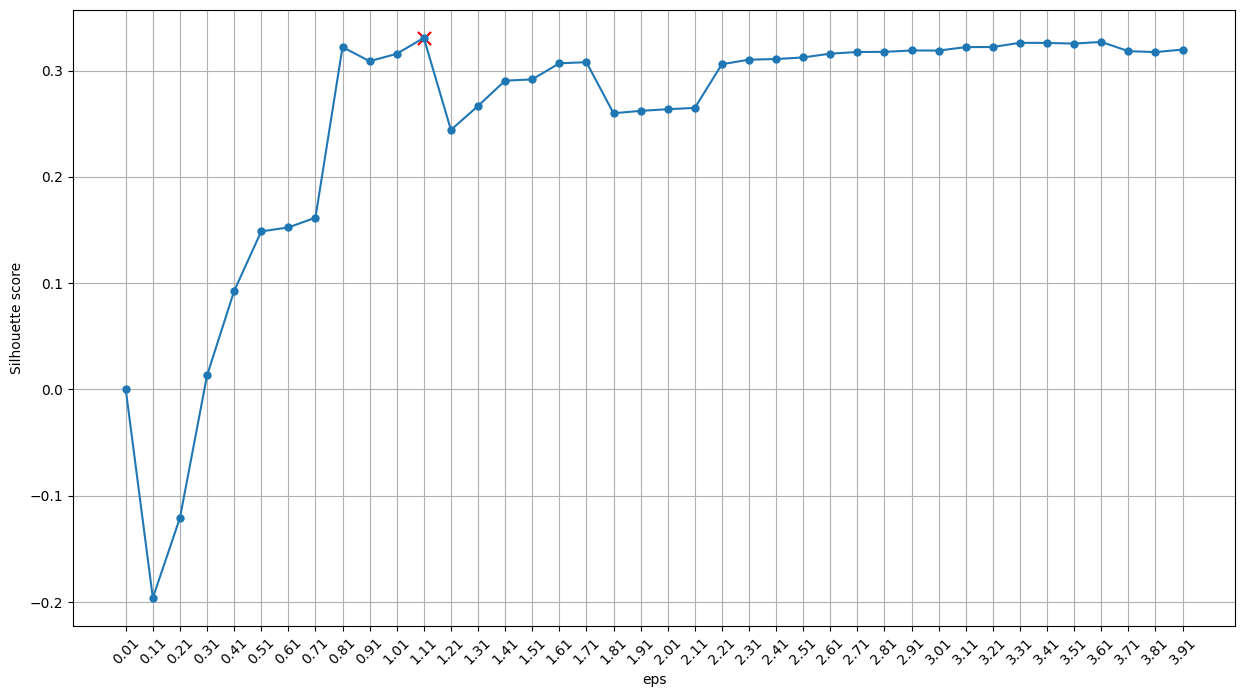

In [14]:
# Plot

plt.figure(figsize=(15, 8))
plt.plot(eps_list,shs, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('eps')
plt.ylabel('Silhouette score')
plt.xticks([k for k in eps_range],rotation=45)
plt.show()

Performing DBSCAN with the just found parameter

In [15]:
dbscan = DBSCAN(eps=1.11, min_samples=40)
dbscan.fit(df[features])

score = silhouette_score(
        df[~df.index.isin(np.where(dbscan.labels_ == -1)[0])][features], 
        np.delete(dbscan.labels_, np.where(dbscan.labels_ == -1))
    )
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise_ = list(dbscan.labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette score: {score}")

Estimated number of clusters: 38
Estimated number of clusters: 13
Estimated number of noise points: 4122
Silhouette score: 0.3475485849688562


# Clustering with PCA Dataset

### Kmeans with pca dataset
Tuning ``n_clusters`` with silhouette score and clustering error

In [17]:
kmeans_results = []
for k in range(2, 51):
    print(k)
    kmeans_results.append(KMeans(n_clusters=k, init='random', n_init=10).fit(X_pca))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


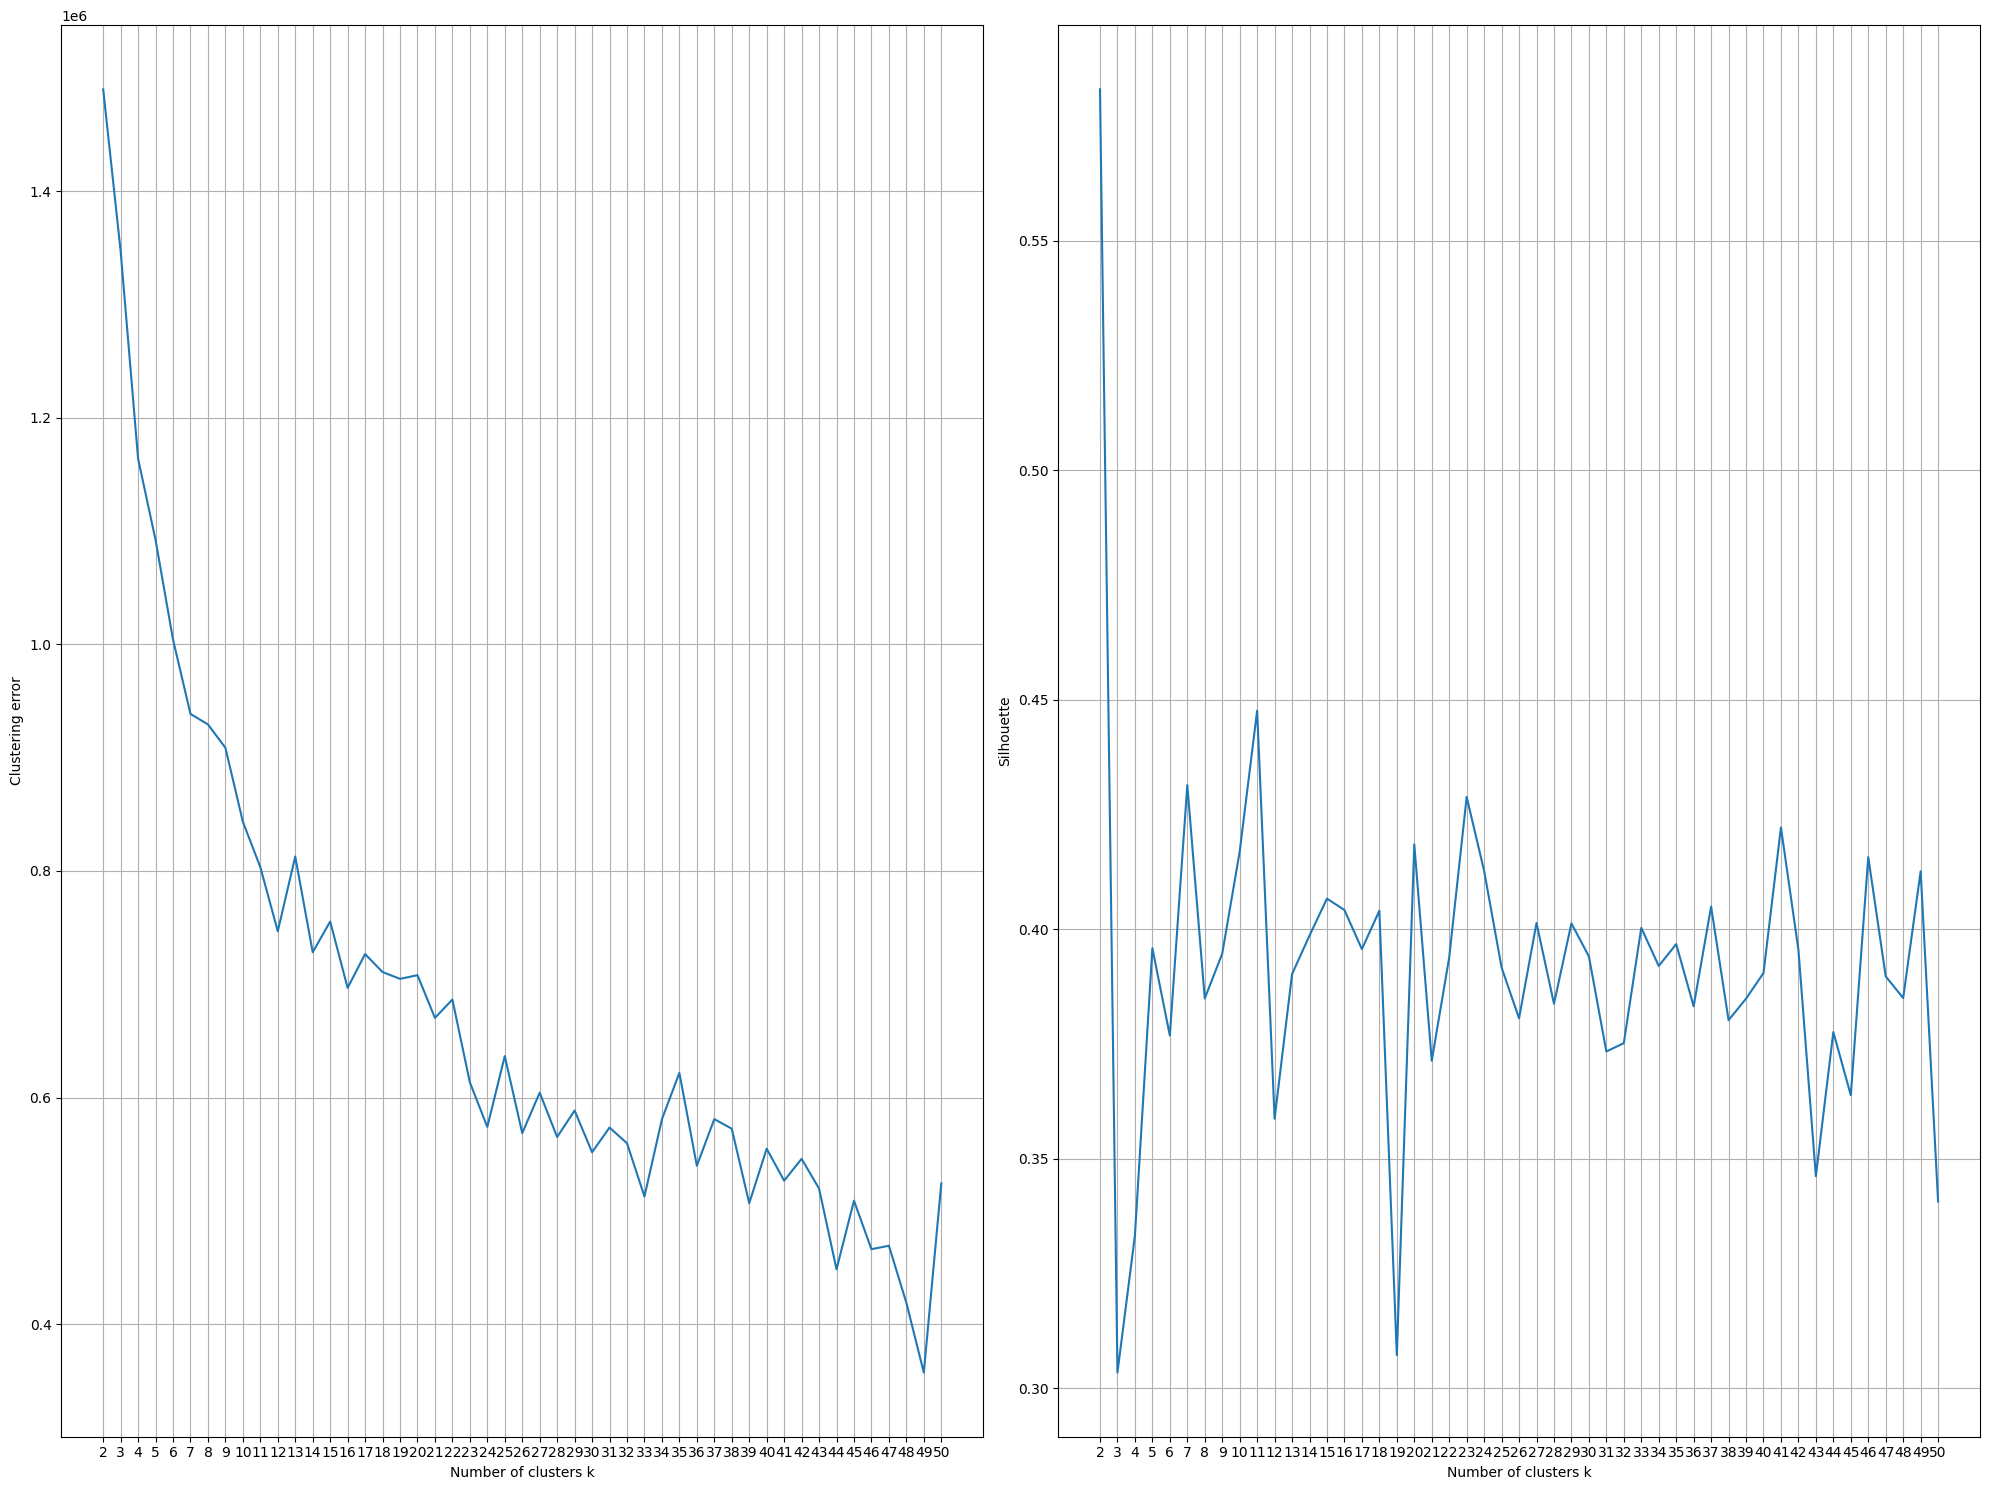

In [18]:
fig, axs = plt.subplots(1,2, figsize=(20, 15))
axs[0].plot(
    [k for k in range(2,51)], 
    [result.inertia_ for result in kmeans_results]
)
axs[0].set_xlabel("Number of clusters k")
axs[0].set_ylabel("Clustering error")
axs[0].set_xticks([k for k in range(2,51)])
axs[0].grid()

axs[1].plot(
    [k for k in range(2,51)], 
    [silhouette_score(X_pca, result.labels_) for result in kmeans_results]
)

axs[1].set_xticks([k for k in range(2,51)])
axs[1].set_xlabel("Number of clusters k")
axs[1].set_ylabel("Silhouette")
axs[1].grid()

plt.tight_layout()
plt.show()

Performing kmeans with the just found parameter

Sum of squared distances of the samples from their centroid:  1937268.577186985
Mean squared distances of the samples from their centroid:  30.157203212798844
Silhouette score of the samples:  0.3691636307407243
RI between clustering and given classes is  0.9161414860240842
ARI between clustering and given classes is  0.4184096987597398


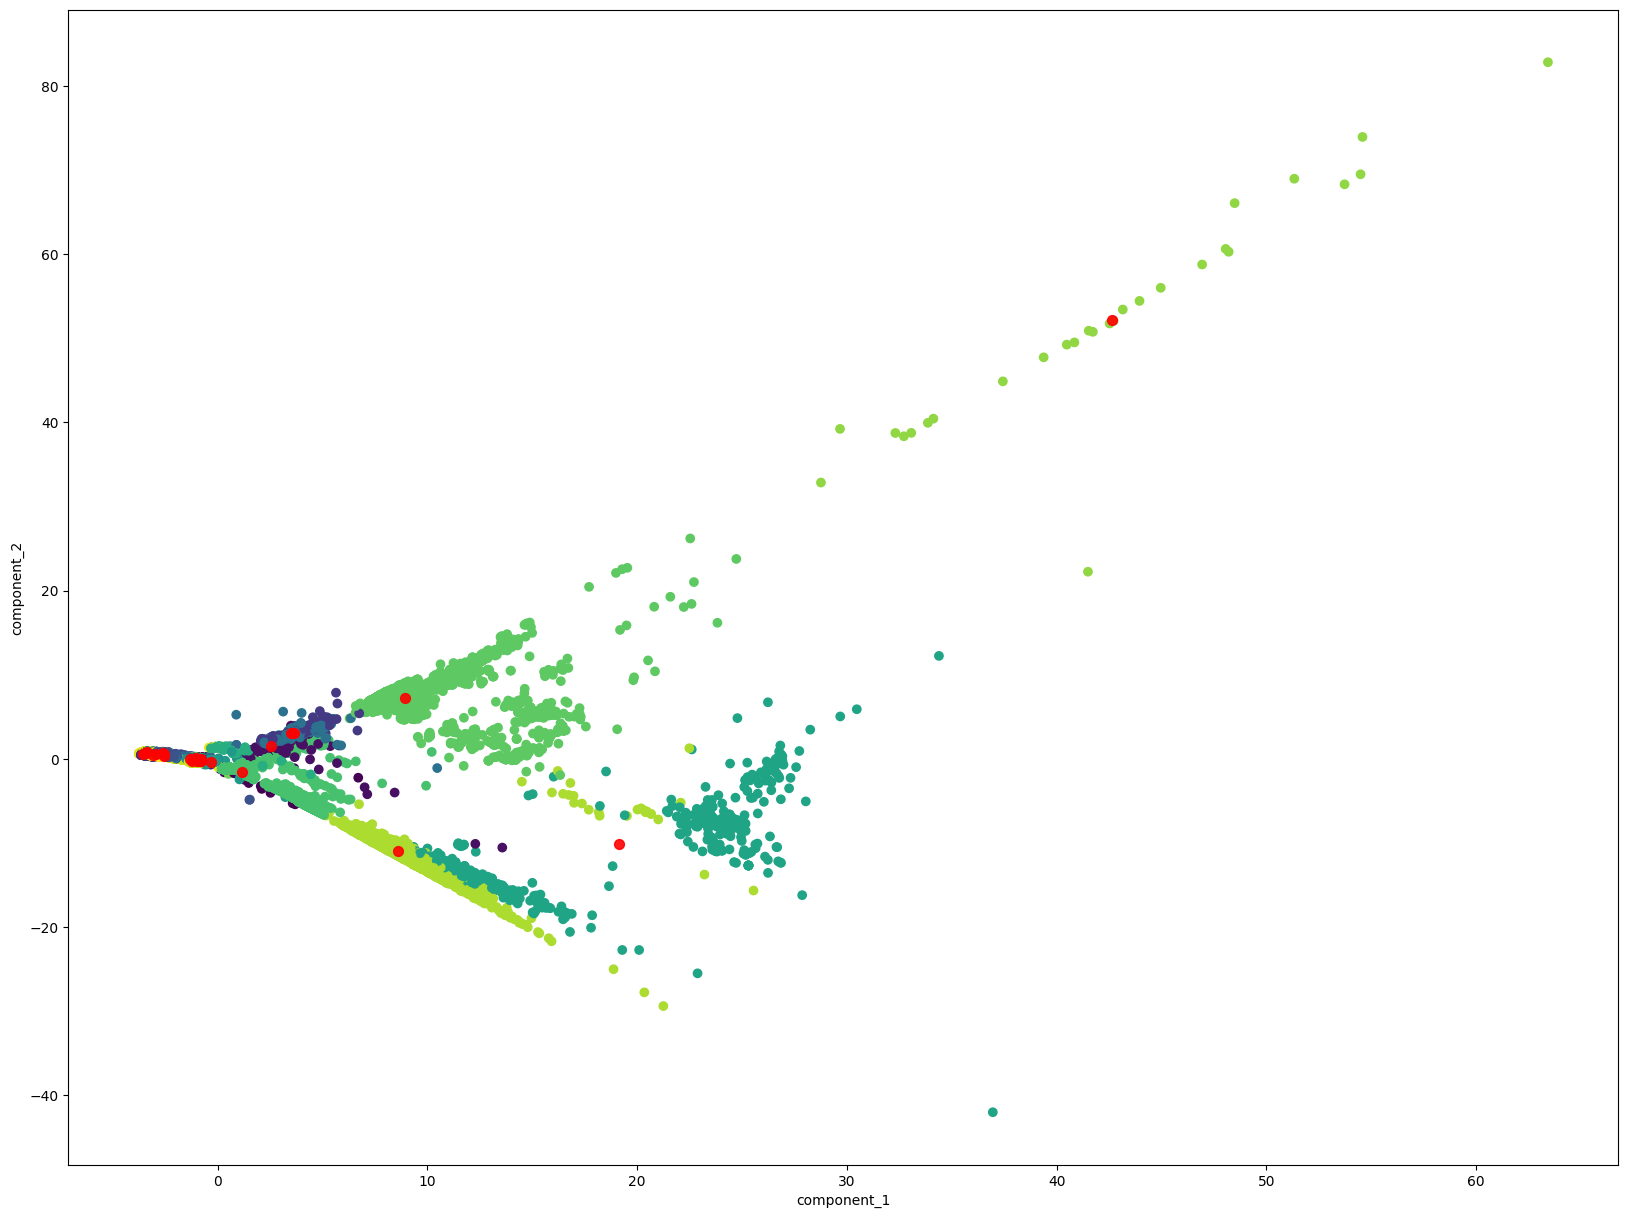

In [19]:
kmeans = KMeans(n_clusters=25, init='random',n_init=10)
kmeans.fit(df_pca[pca_features])

#Sum of squared distances of samples to their closest cluster center.
print("Sum of squared distances of the samples from their centroid: ", kmeans.inertia_)
# If we divide it by number of sample m, it is the clustering error we have seen in theoretical lectures
print("Mean squared distances of the samples from their centroid: ", kmeans.inertia_/len(df_pca))

# To compute the silhouette, sklearn provides the silhouette_score in the metrics sklearn.metrics library
print("Silhouette score of the samples: ",silhouette_score(df_pca[df_pca.columns[:-1]], kmeans.labels_))

rand_score_result = rand_score(df_pca['label'], kmeans.labels_)
adj_rand_score_result = adjusted_rand_score(df_pca['label'], kmeans.labels_)

print("RI between clustering and given classes is ",rand_score_result)
print("ARI between clustering and given classes is ",adj_rand_score_result)

plot_clustering(df_pca[df_pca.columns[:-1]], kmeans.labels_, kmeans.cluster_centers_)

### GMM with pca dataset

Tuning ``n_components`` parameter based on silhouette and log-likelyhood

In [21]:
# GMM
n_clusters_range = range(10, 61)
n_cluster_list=[]
shs_list = []
log_l_list=[]
for n_clusters in n_clusters_range:
    print(n_clusters)
    gmm = GaussianMixture(n_components=n_clusters,init_params='kmeans')
    cl_labels = gmm.fit_predict(X_pca)
    silhouette  = silhouette_score(X_pca, cl_labels)
    n_cluster_list.append(n_clusters)
    shs_list.append(silhouette)
    log_l_list.append(gmm.score(X_pca))

shs =np.nan_to_num(np.array(shs),nan=0)
best_sh= np.max(shs_list)
best_n=n_cluster_list[np.argmax(shs_list)]
print("best k: ",best_n, " with corresponding silhouette: ", best_sh)

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
best k:  17  with corresponding silhouette:  0.47978169643216606


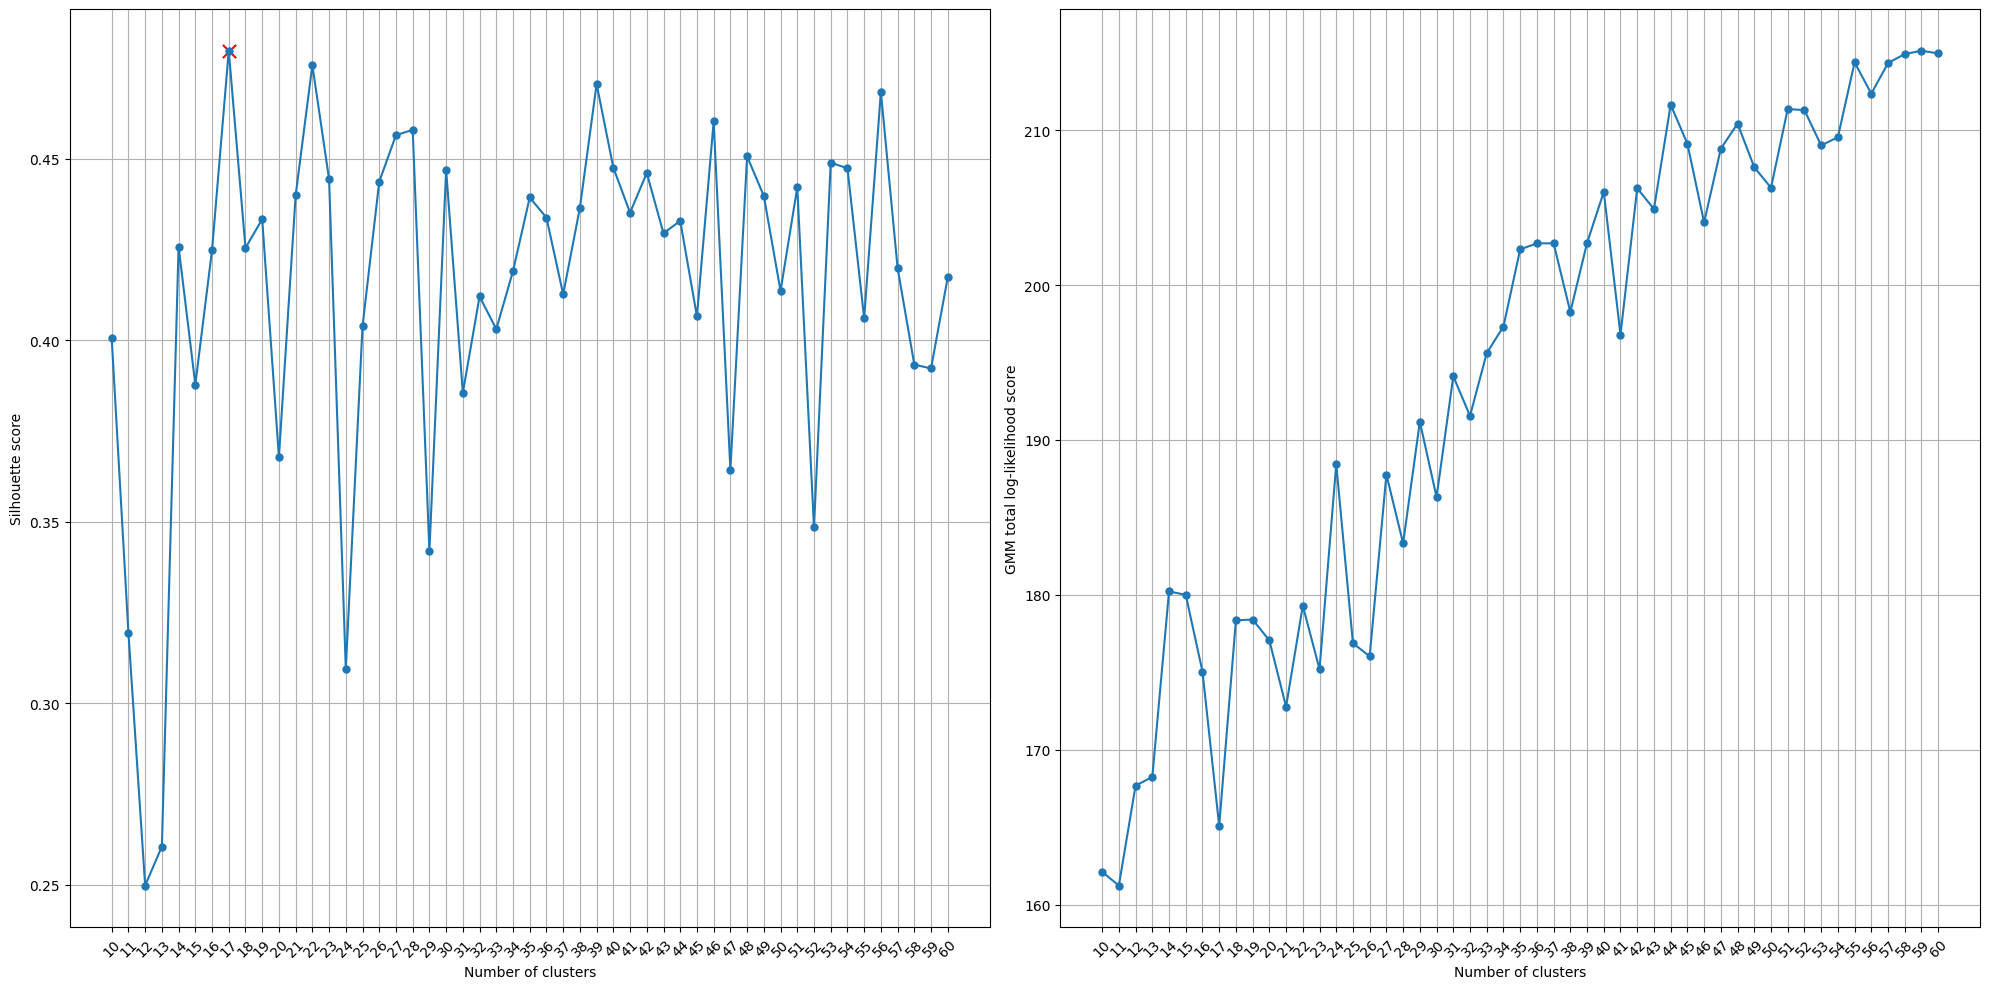

In [22]:
# Plot
fig,ax = plt.subplots(1,2,figsize=(20,10))
n_clusters_range = range(10, 61)
ax[0].plot(n_cluster_list,shs_list, marker='o', markersize=5)
ax[0].scatter(best_n, best_sh, color='r', marker='x', s=90)
ax[0].grid()
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Silhouette score')
ax[0].set_xticks([k for k in n_clusters_range])
ax[0].set_xticklabels([k for k in n_clusters_range],rotation=45)

# Plot GMM total log-likelihood score
ax[1].plot(n_cluster_list,log_l_list, marker='o', markersize=5)
ax[1].grid()
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('GMM total log-likelihood score')
ax[1].set_xticks([k for k in n_clusters_range])
ax[1].set_xticklabels([k for k in n_clusters_range],rotation=45)
plt.tight_layout()

plt.show()

Performing GMM with the just found parameter

The degrees of belonging (probabilities) for the samples are:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

The clustered labels are:
 [11 11 11 ...  5 34 24]

Total log-likelihood score:  203.75835879444946
Silhouette score of the samples:  0.2813395015652431
RI between clustering and given classes is  0.8353361509746354
ARI between clustering and given classes is  0.24849267992028895


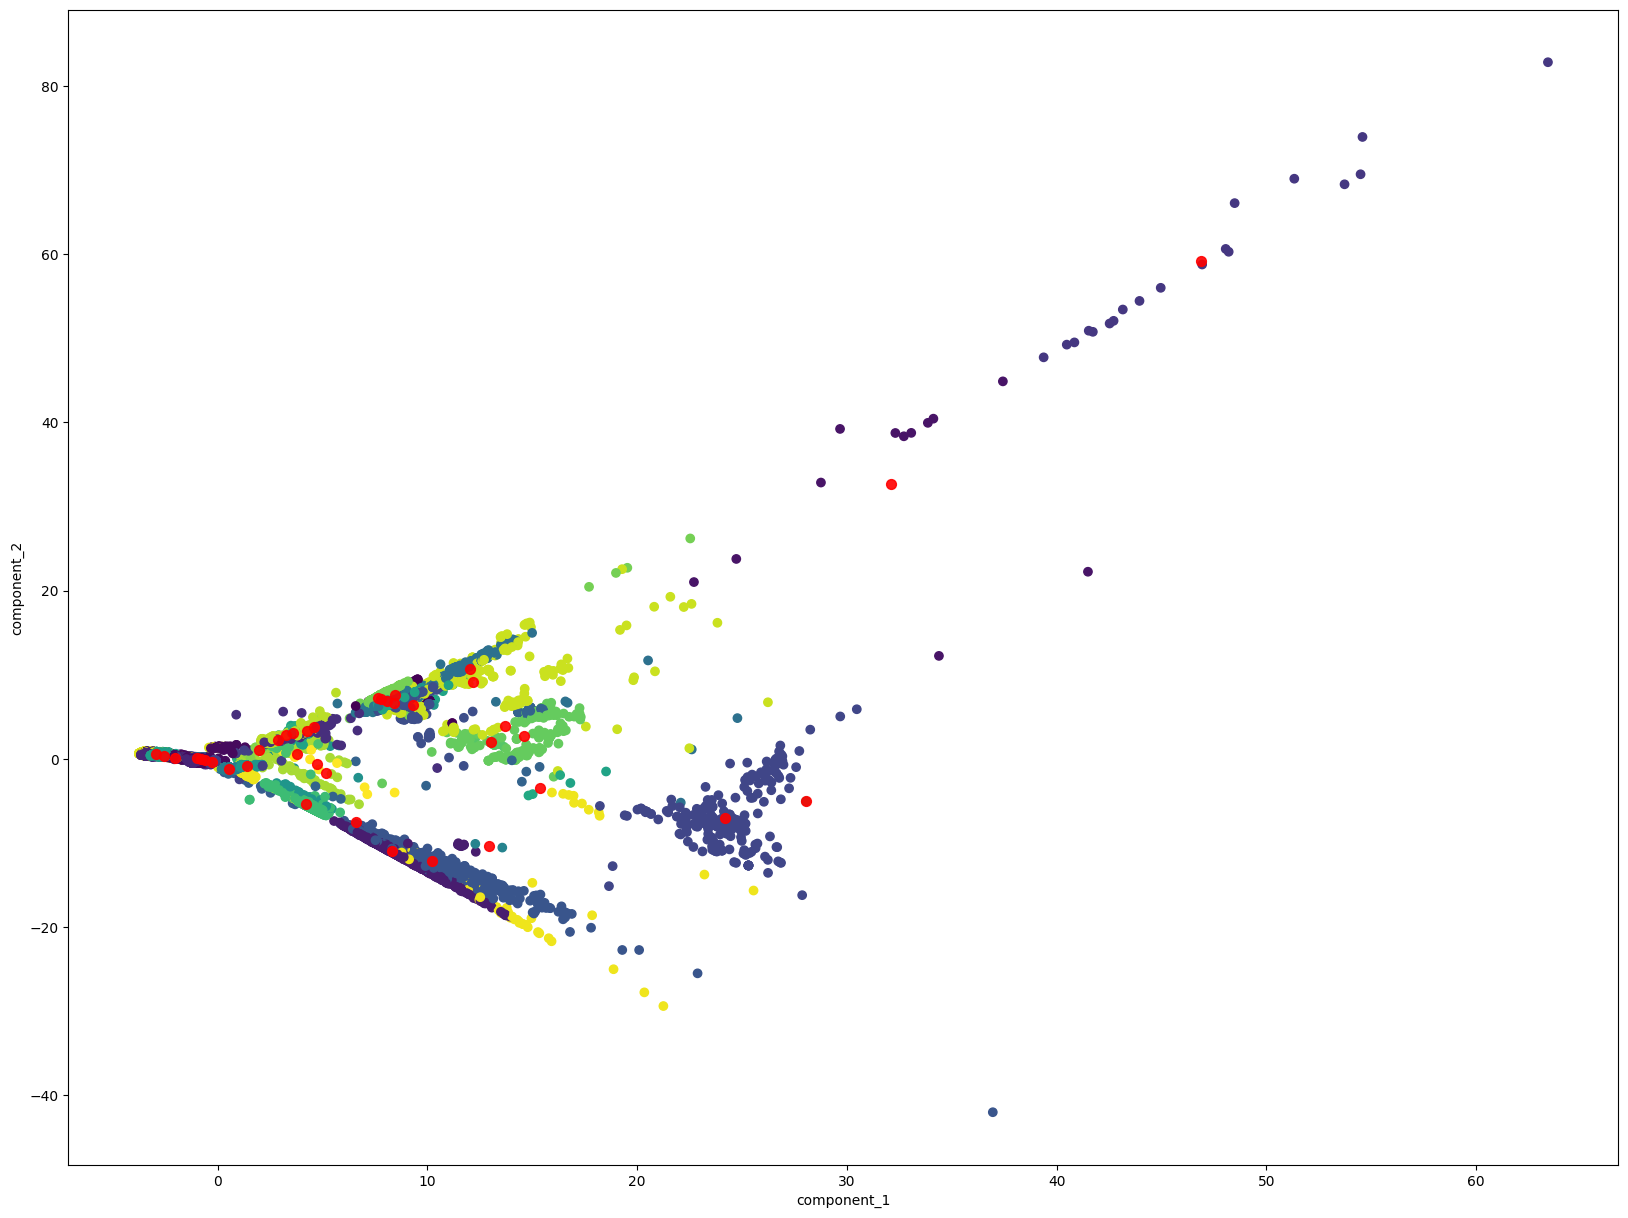

In [25]:
gmm = GaussianMixture(n_components=39, init_params='kmeans')
gmm.fit(df_pca[pca_features])

# print the degree of belonging to each cluster
gmm_probs = gmm.predict_proba(df_pca[pca_features])
with np.printoptions(precision=4, suppress=True): #to print only the first 4 digits
    print('The degrees of belonging (probabilities) for the samples are:\n', gmm_probs)
print()

# print the clustered labels
gmm_labels = gmm.predict(df_pca[pca_features])
print('The clustered labels are:\n', gmm_labels)
print()

print("Total log-likelihood score: ", gmm.score(df_pca[pca_features]) )

print("Silhouette score of the samples: ",silhouette_score(df_pca[pca_features], gmm_labels))

rand_score_result = rand_score(df_pca['label'], gmm_labels)
adj_rand_score_result = adjusted_rand_score(df_pca['label'], gmm_labels)

print("RI between clustering and given classes is ",rand_score_result)
print("ARI between clustering and given classes is ",adj_rand_score_result)

plot_clustering(df_pca[pca_features], gmm_labels, gmm.means_)

### DBSCAN with PCA dataset
Tuning ``eps`` based on silhouette

In [26]:
# DBSCAN
eps_range = np.arange(0.01, 4, 0.1)
shs = []
shsNoOut=[]
eps_list = []
for eps in eps_range:
    print(eps)
    dbscan = DBSCAN(eps=eps, min_samples=40)
    cl_labels3 = dbscan.fit_predict(X_pca)
    try:
        silhouette  = silhouette_score(X_pca, cl_labels3)
    except:
        silhouette = np.nan
    try:
        score = silhouette_score(
        X_pca[~X_pca.index.isin(np.where(cl_labels3 == -1)[0])], 
        np.delete(cl_labels3, np.where(cl_labels3 == -1))
    )
    except:
        score=np.nan
        
    eps_list.append(eps)
    shs.append(silhouette)
    shsNoOut.append(score)


In [27]:

shs =np.nan_to_num(np.array(shs),nan=0)
best_sh= np.max(shs)
best_n=eps_list[np.argmax(shs)]

shsNoOut =np.nan_to_num(np.array(shsNoOut),nan=0)
best_sh_NoOut= np.max(shsNoOut)
best_n_NoOut=eps_list[np.argmax(shsNoOut)]

print("best eps: ",round(best_n,3), " with corresponding silhouette: ", best_sh)
print("best eps: ",round(best_n_NoOut,3), " with corresponding silhouette: ", best_sh_NoOut)


best eps:  1.21  with corresponding silhouette:  0.34948531776660857
best eps:  0.81  with corresponding silhouette:  0.502494605072682


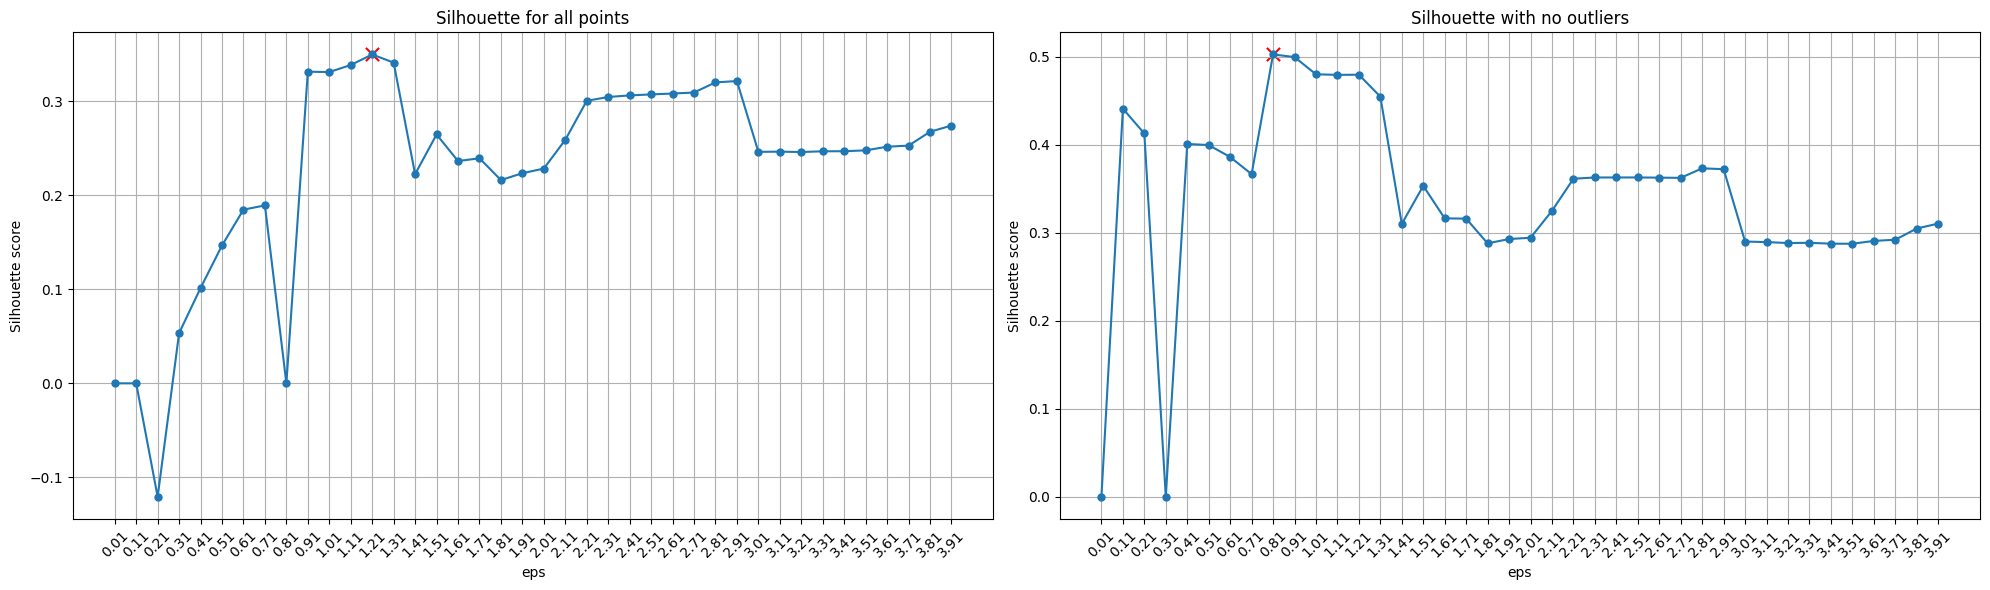

In [28]:
# Plot
fig, ax = plt.subplots(1,2, figsize=(20, 6))

ax[0].plot(eps_list,shs, marker='o', markersize=5)
ax[0].scatter(best_n, best_sh, color='r', marker='x', s=90)
ax[0].set_xlabel('eps')
ax[0].set_ylabel('Silhouette score')
ax[0].set_xticks([round(k,3) for k in eps_range])
ax[0].set_xticklabels([round(k,3) for k in eps_range],rotation=45)
ax[0].grid()
ax[0].set_title("Silhouette for all points")

ax[1].plot(eps_list,shsNoOut, marker='o', markersize=5)
ax[1].scatter(best_n_NoOut, best_sh_NoOut, color='r', marker='x', s=90)
ax[1].set_xlabel('eps')
ax[1].set_ylabel('Silhouette score')
ax[1].set_xticks([round(k,3) for k in eps_range])
ax[1].set_xticklabels([round(k,3) for k in eps_range],rotation=45)
ax[1].grid()
ax[1].set_title("Silhouette with no outliers")
plt.tight_layout()
plt.show()

Performing DBSCAN with the just found parameter

Estimated number of clusters: 42
Estimated number of noise points: 4849
Silhouette score without outliers: 0.3333074495092075
Silhouette score with outliers: 0.26389214592693927


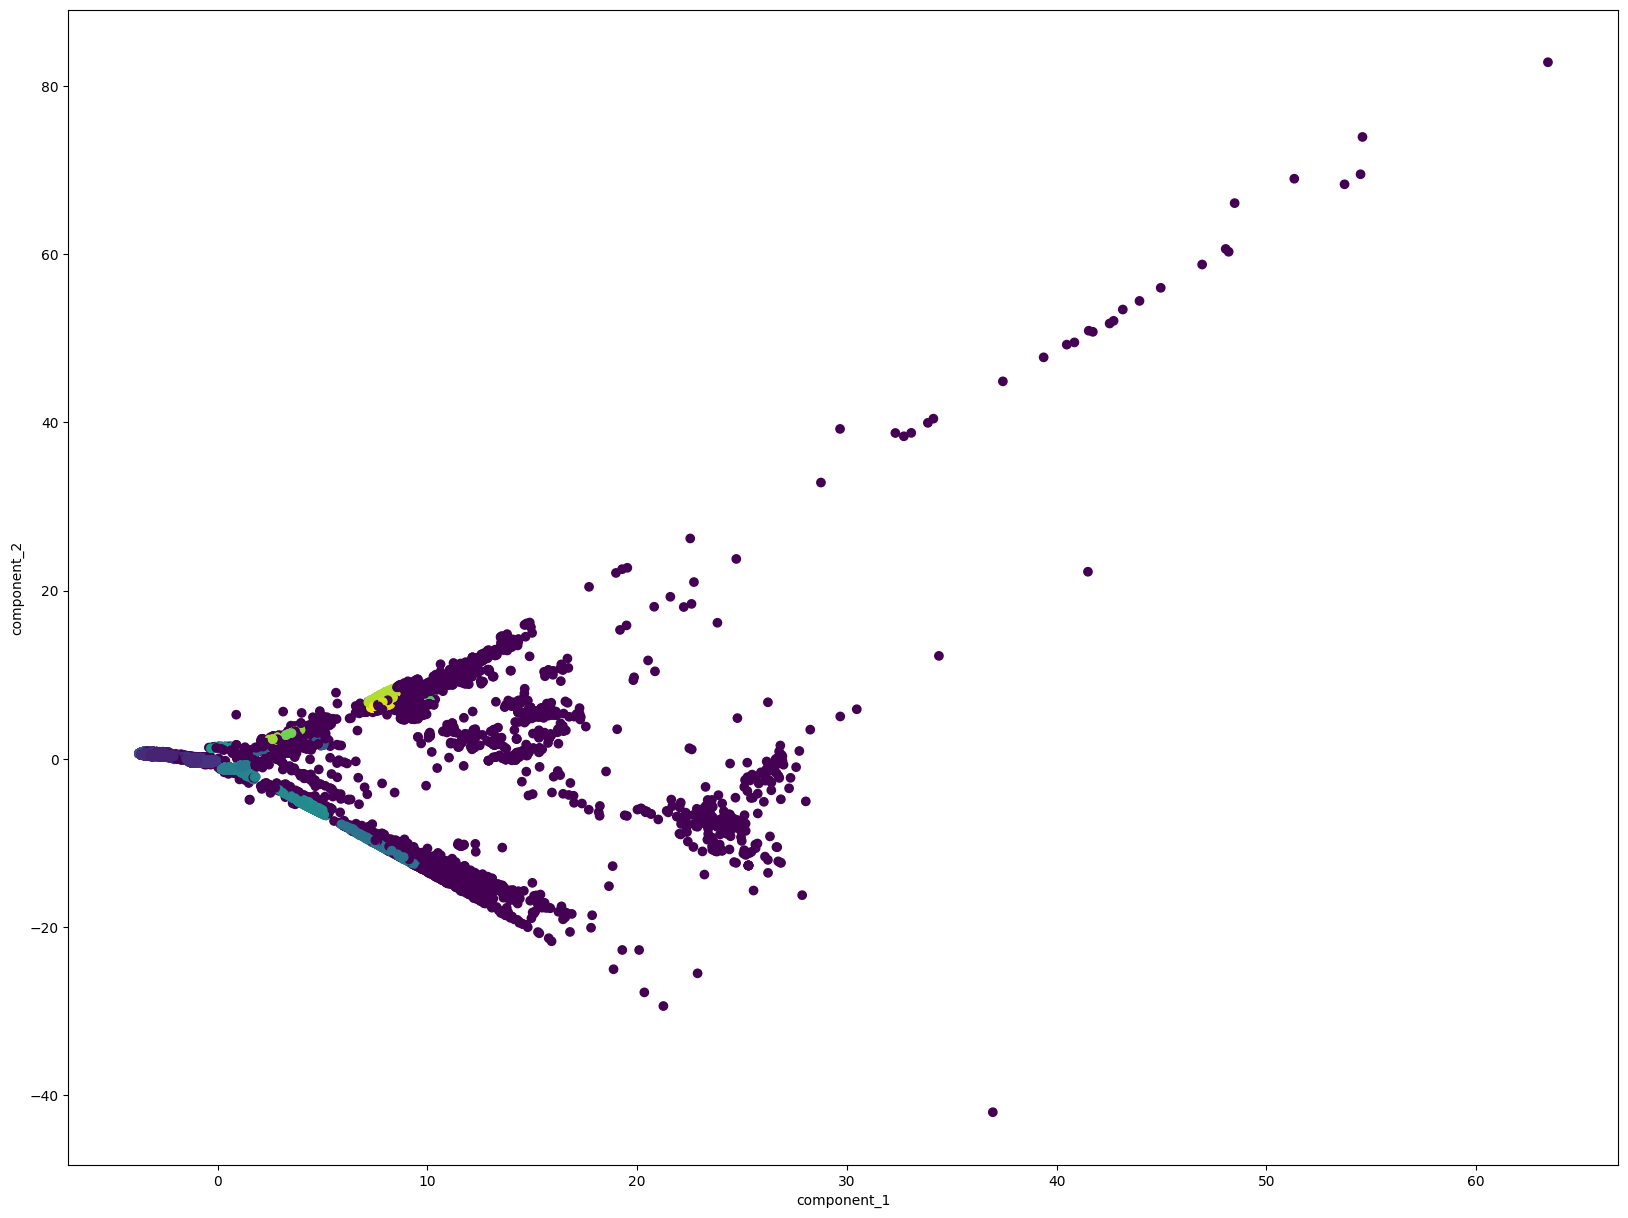

In [29]:
dbscan = DBSCAN(eps=1.21, min_samples=40)
cl_labels = dbscan.fit_predict(df_pca[pca_features])

score = silhouette_score(
        df_pca[~df_pca.index.isin(np.where(dbscan.labels_ == -1)[0])][pca_features], 
        np.delete(dbscan.labels_, np.where(dbscan.labels_ == -1))
    )
score_wo = silhouette_score(df_pca[pca_features], dbscan.labels_)
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise_ = list(dbscan.labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette score without outliers: {score}")
print(f"Silhouette score with outliers: {score_wo}")
plot_clustering(df_pca[pca_features],dbscan.labels_)

# Clusters explainability
### Comparison with GT labels
DBSCAN

In [6]:
y = df_pca["label"]

In [9]:
dbscan = DBSCAN(eps=1.21, min_samples=40)
cl_labels_db = dbscan.fit_predict(df_pca[pca_features])

projection_db = df_pca.copy()
projection_db["cidBest"] = [f'C{x}' for x in cl_labels_db]



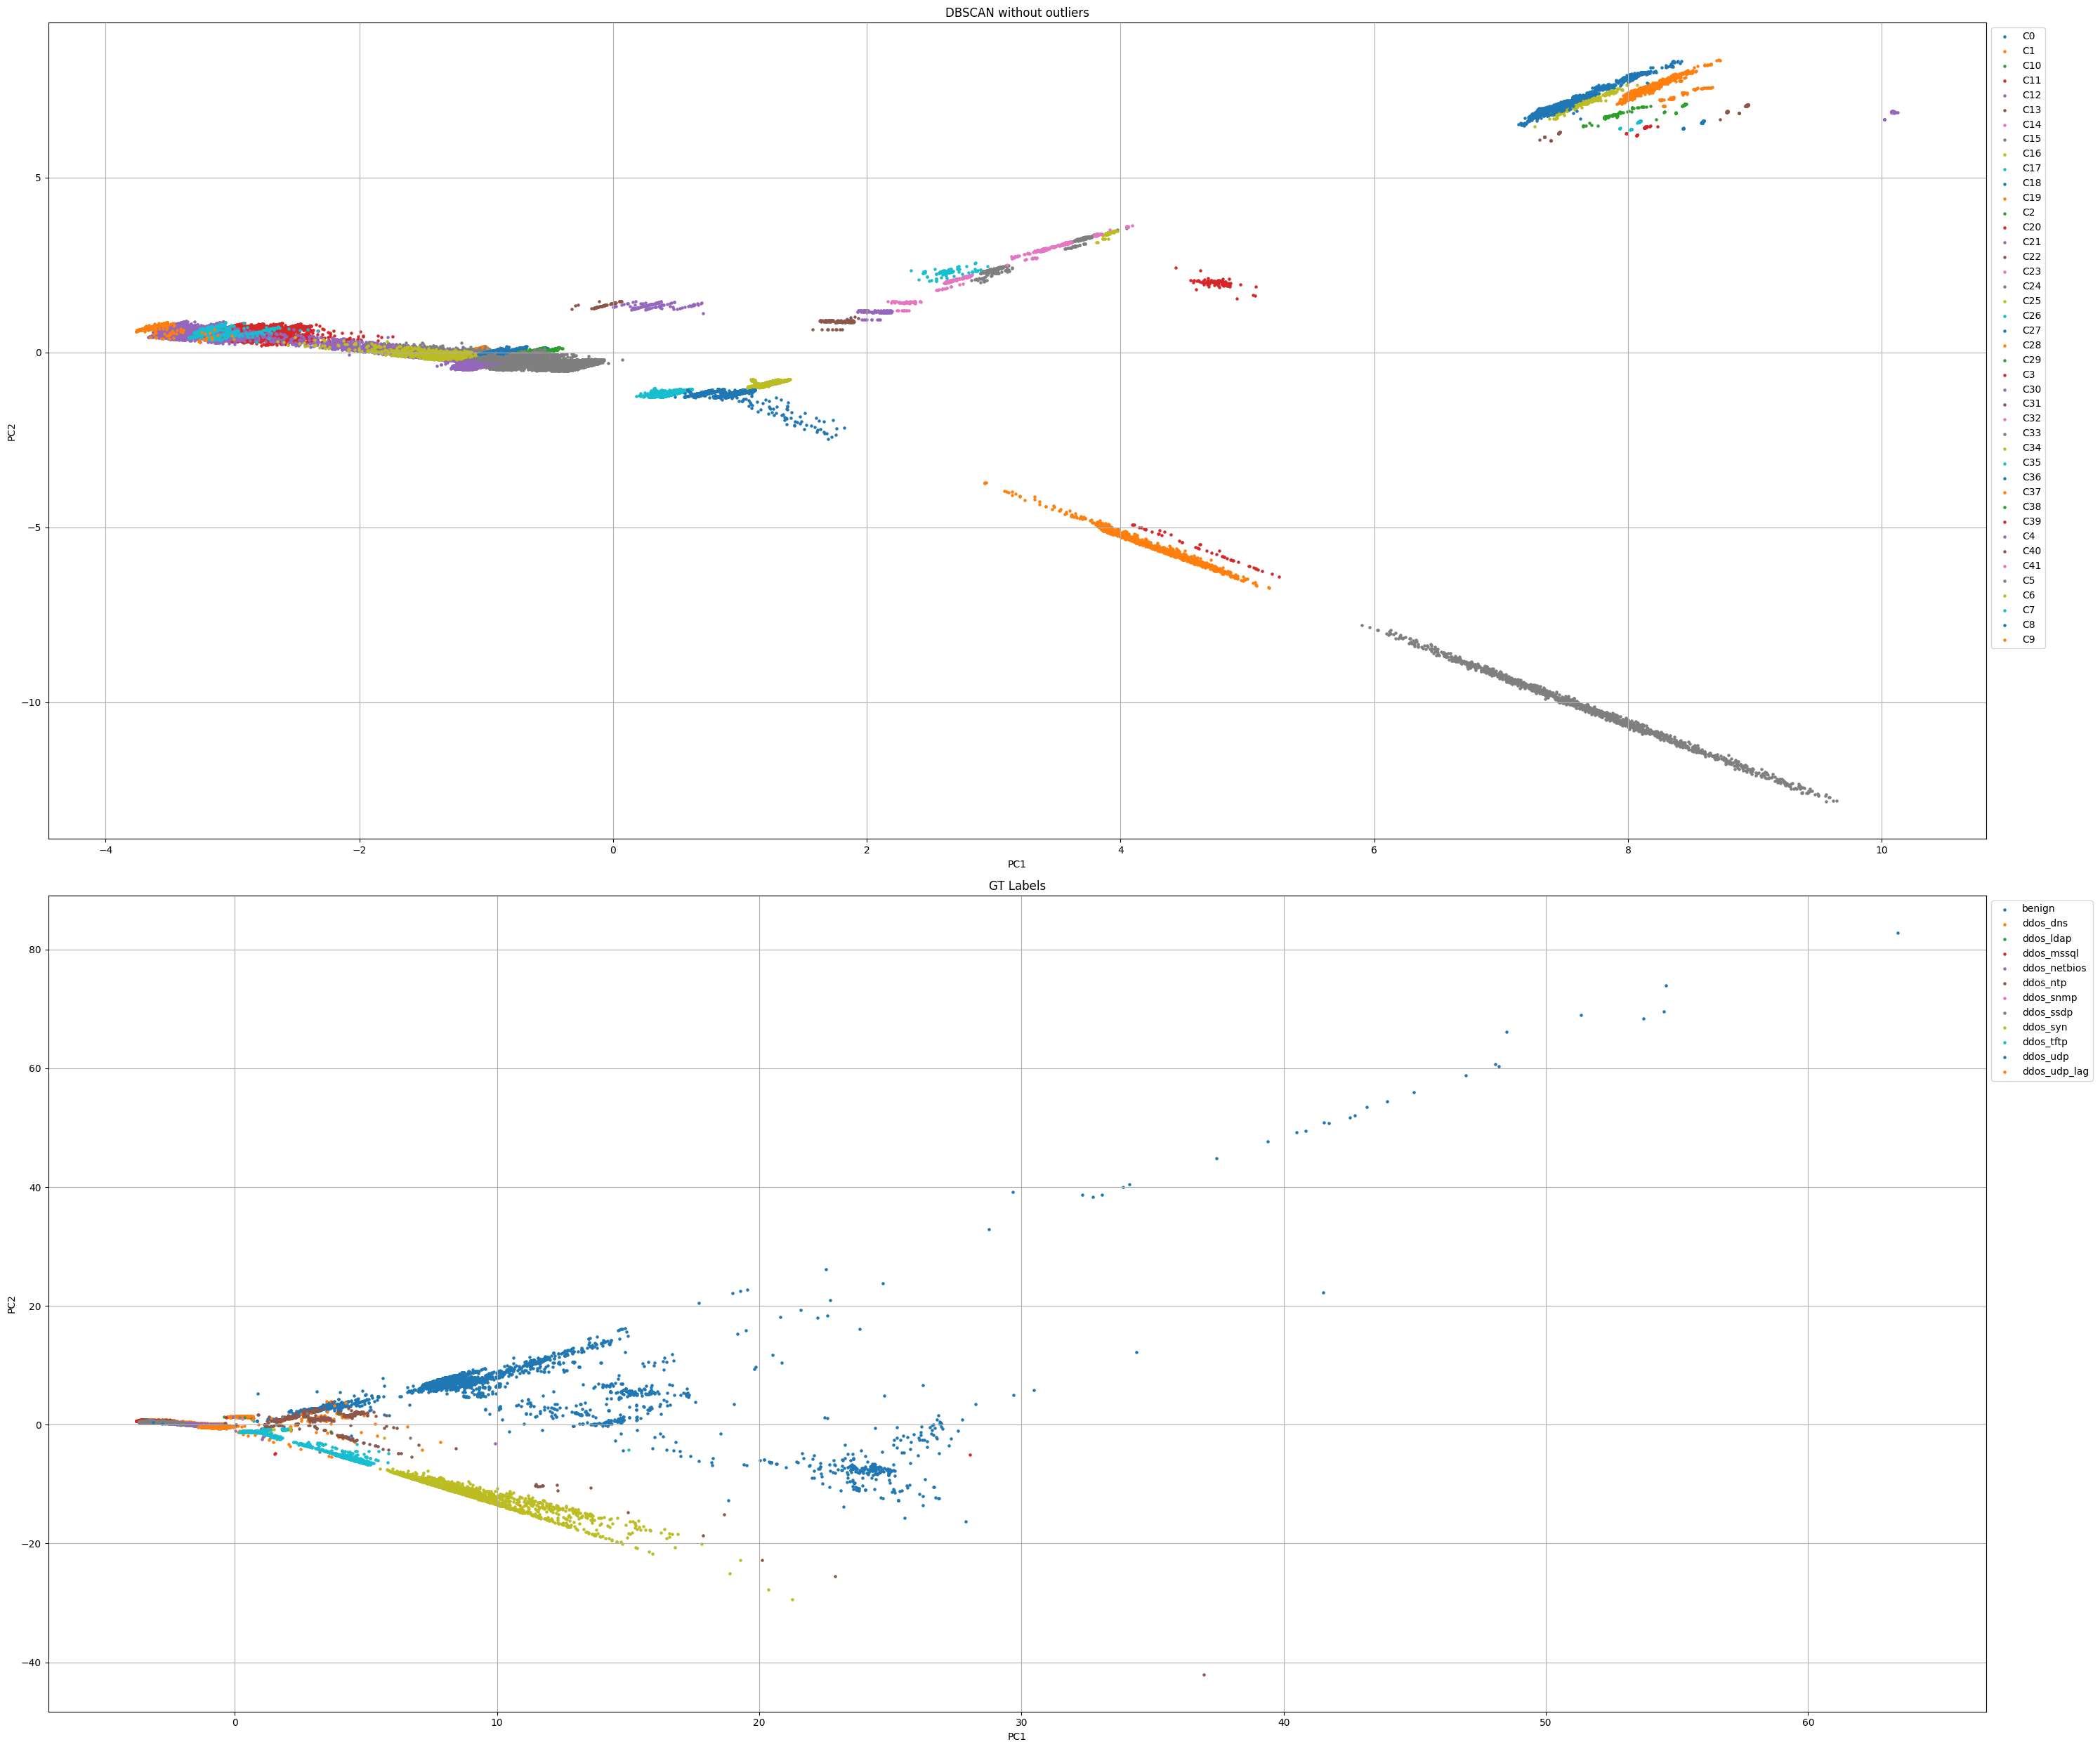

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(30,25))
for i in np.unique(projection_db.cidBest):
    if i == "C-1":
        continue
    subdf = projection_db[projection_db.cidBest==i]
    axs[0].scatter(subdf["component_1"], subdf["component_2"], label=i, s=5)
axs[0].grid()
lgnd = axs[0].legend(bbox_to_anchor=(1, 1), loc="upper left")

axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].set_title(f'DBSCAN without outliers')

for i in np.unique(y):
# for i in ["ddos_syn"]:
    subdf = projection_db[projection_db.label==i]
    axs[1].scatter(subdf["component_1"], subdf["component_2"], label=i, s=5)
axs[1].grid()
lgnd = axs[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].set_title('GT Labels')


plt.tight_layout()
plt.show()

In [7]:

kmeans = KMeans(n_clusters=25, init='random',n_init=10)
cl_labels_km = kmeans.fit_predict(df_pca[pca_features])


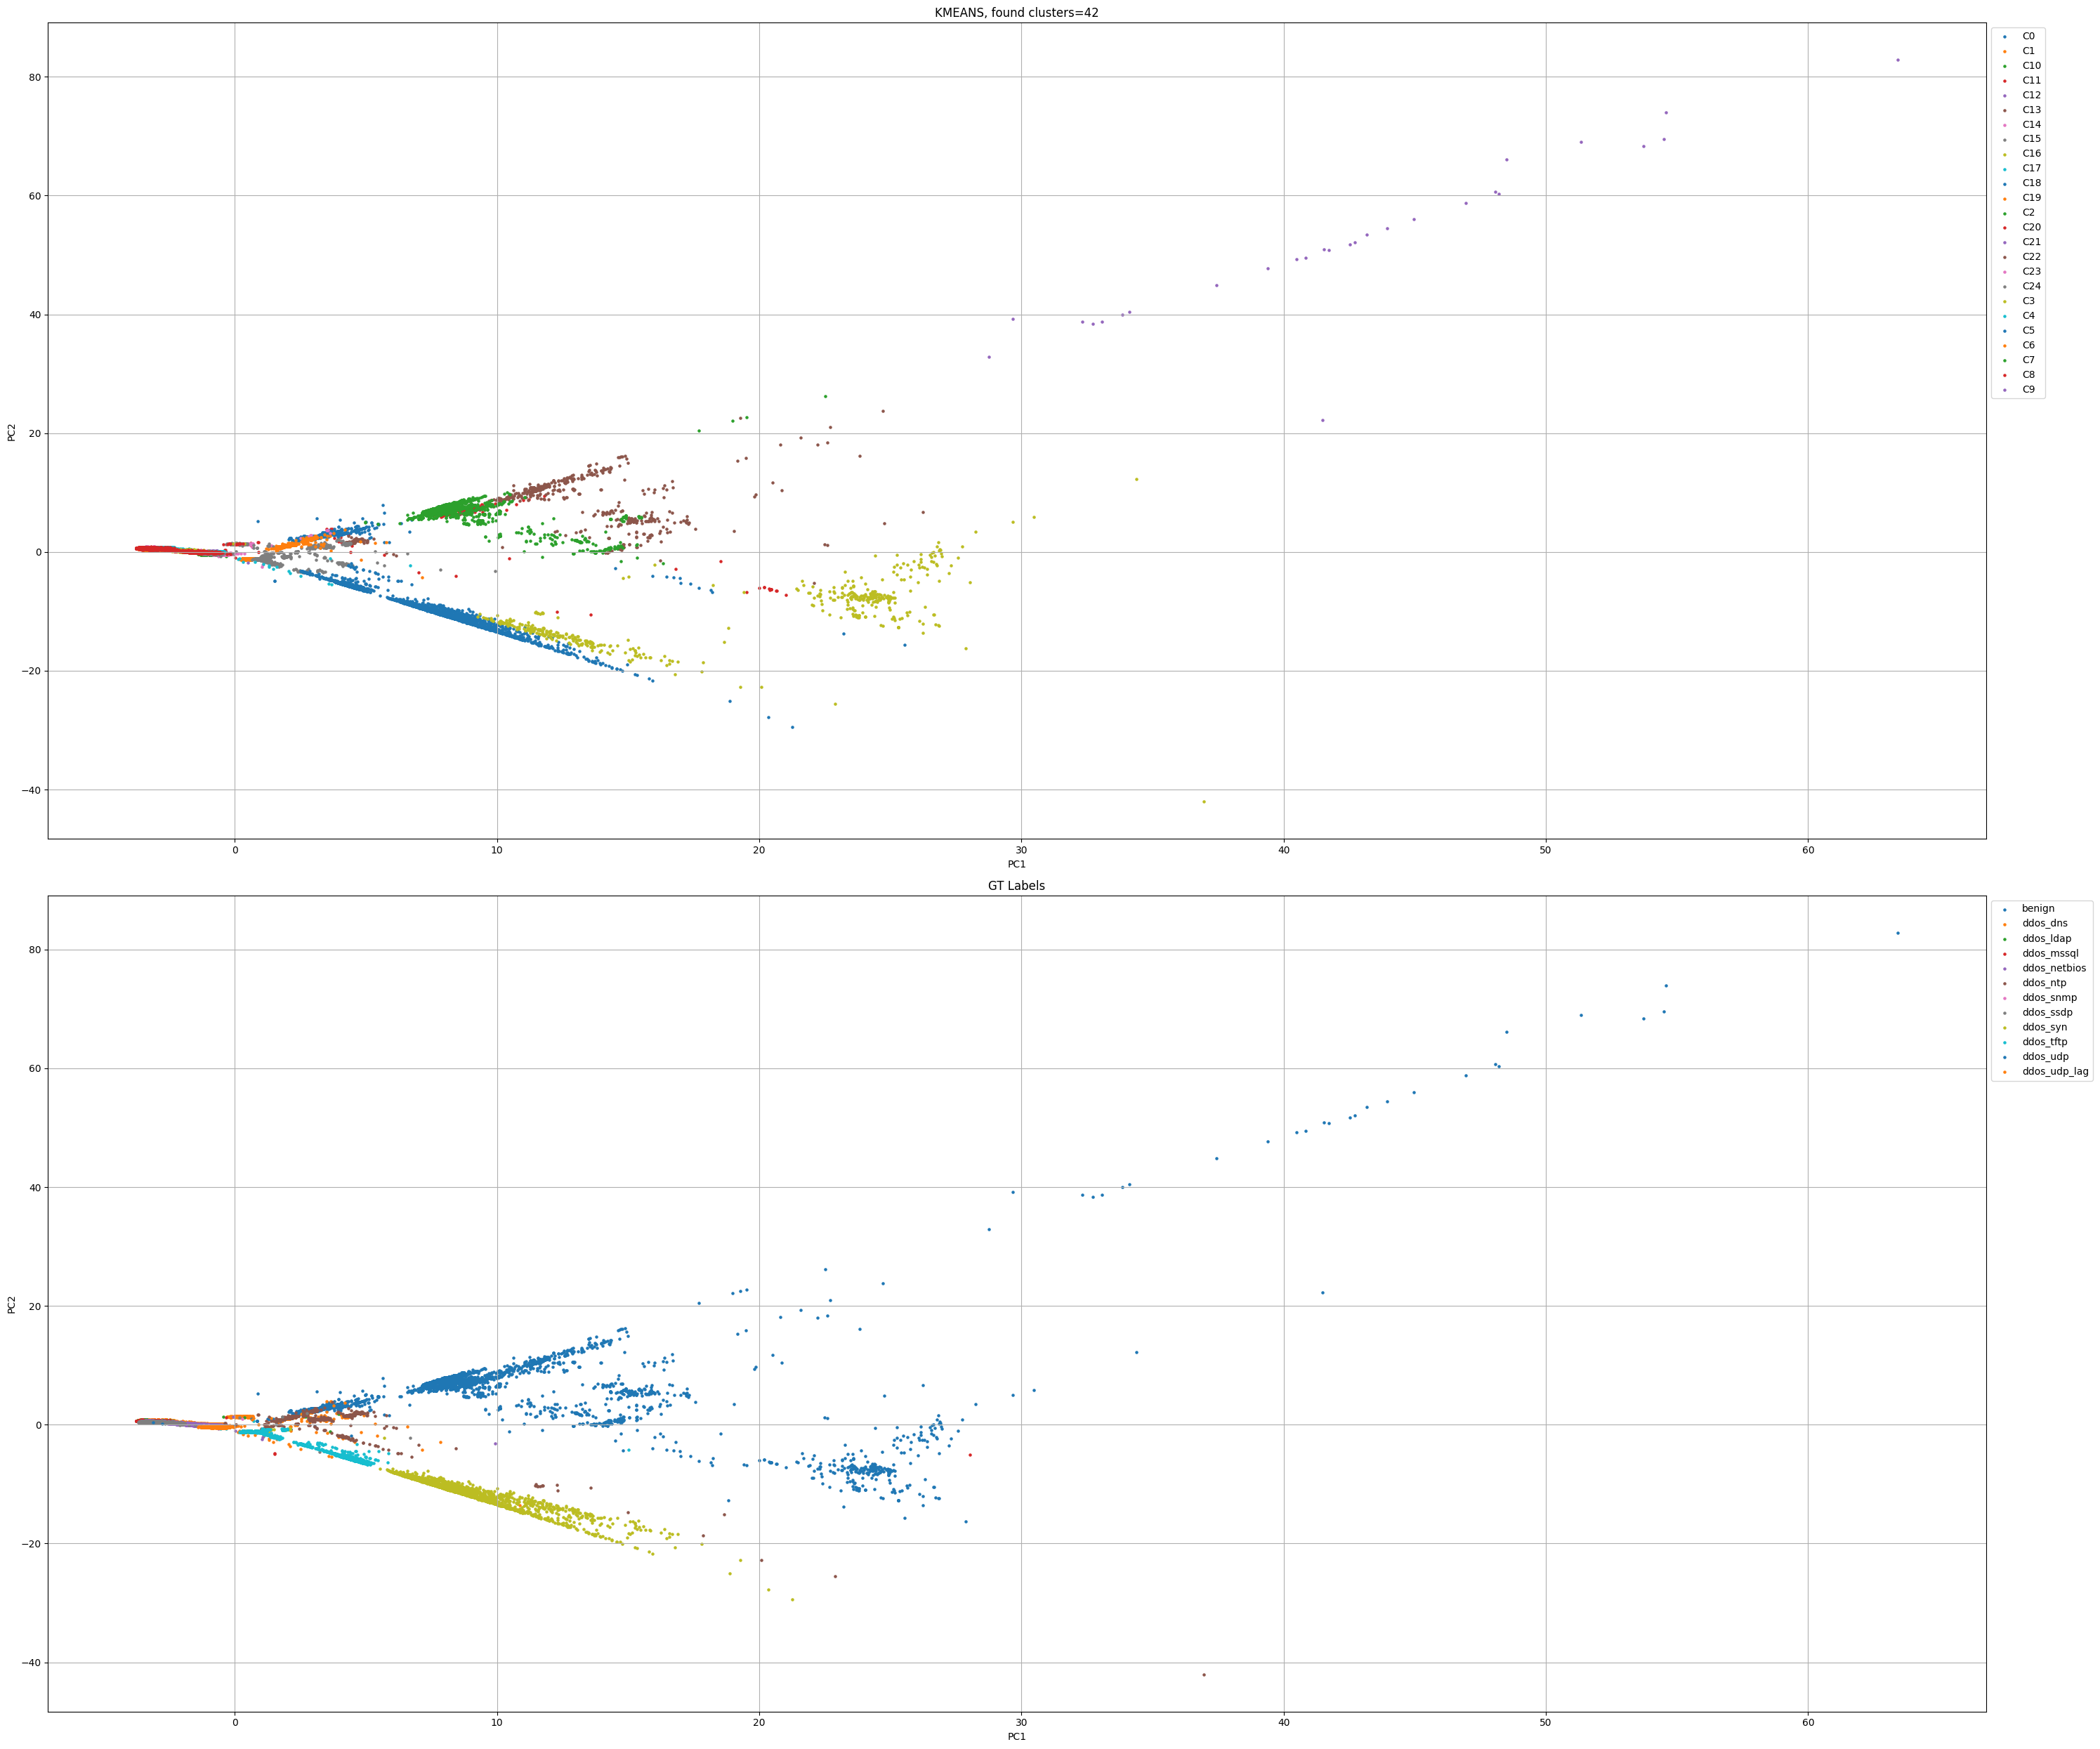

In [8]:
projection_km = df_pca.copy()
projection_km["cidBest"] = [f'C{x}' for x in cl_labels_km]

fig, axs = plt.subplots(2, 1, figsize=(30,25))
for i in np.unique(projection_km.cidBest):
    subdf = projection_km[projection_km.cidBest==i]
    axs[0].scatter(subdf["component_1"], subdf["component_2"], label=i, s=5)
axs[0].grid()
lgnd = axs[0].legend(bbox_to_anchor=(1, 1), loc="upper left")

axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].set_title(f'KMEANS, found clusters=42')

for i in np.unique(y):
    subdf = projection_km[projection_km.label==i]
    axs[1].scatter(subdf["component_1"], subdf["component_2"], label=i, s=5)
axs[1].grid()
lgnd = axs[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].set_title('GT Labels')


plt.tight_layout()
plt.show()

In [12]:
gmm = GaussianMixture(n_components=34, init_params='kmeans')
cl_labels_gmm = gmm.fit_predict(df_pca[pca_features])


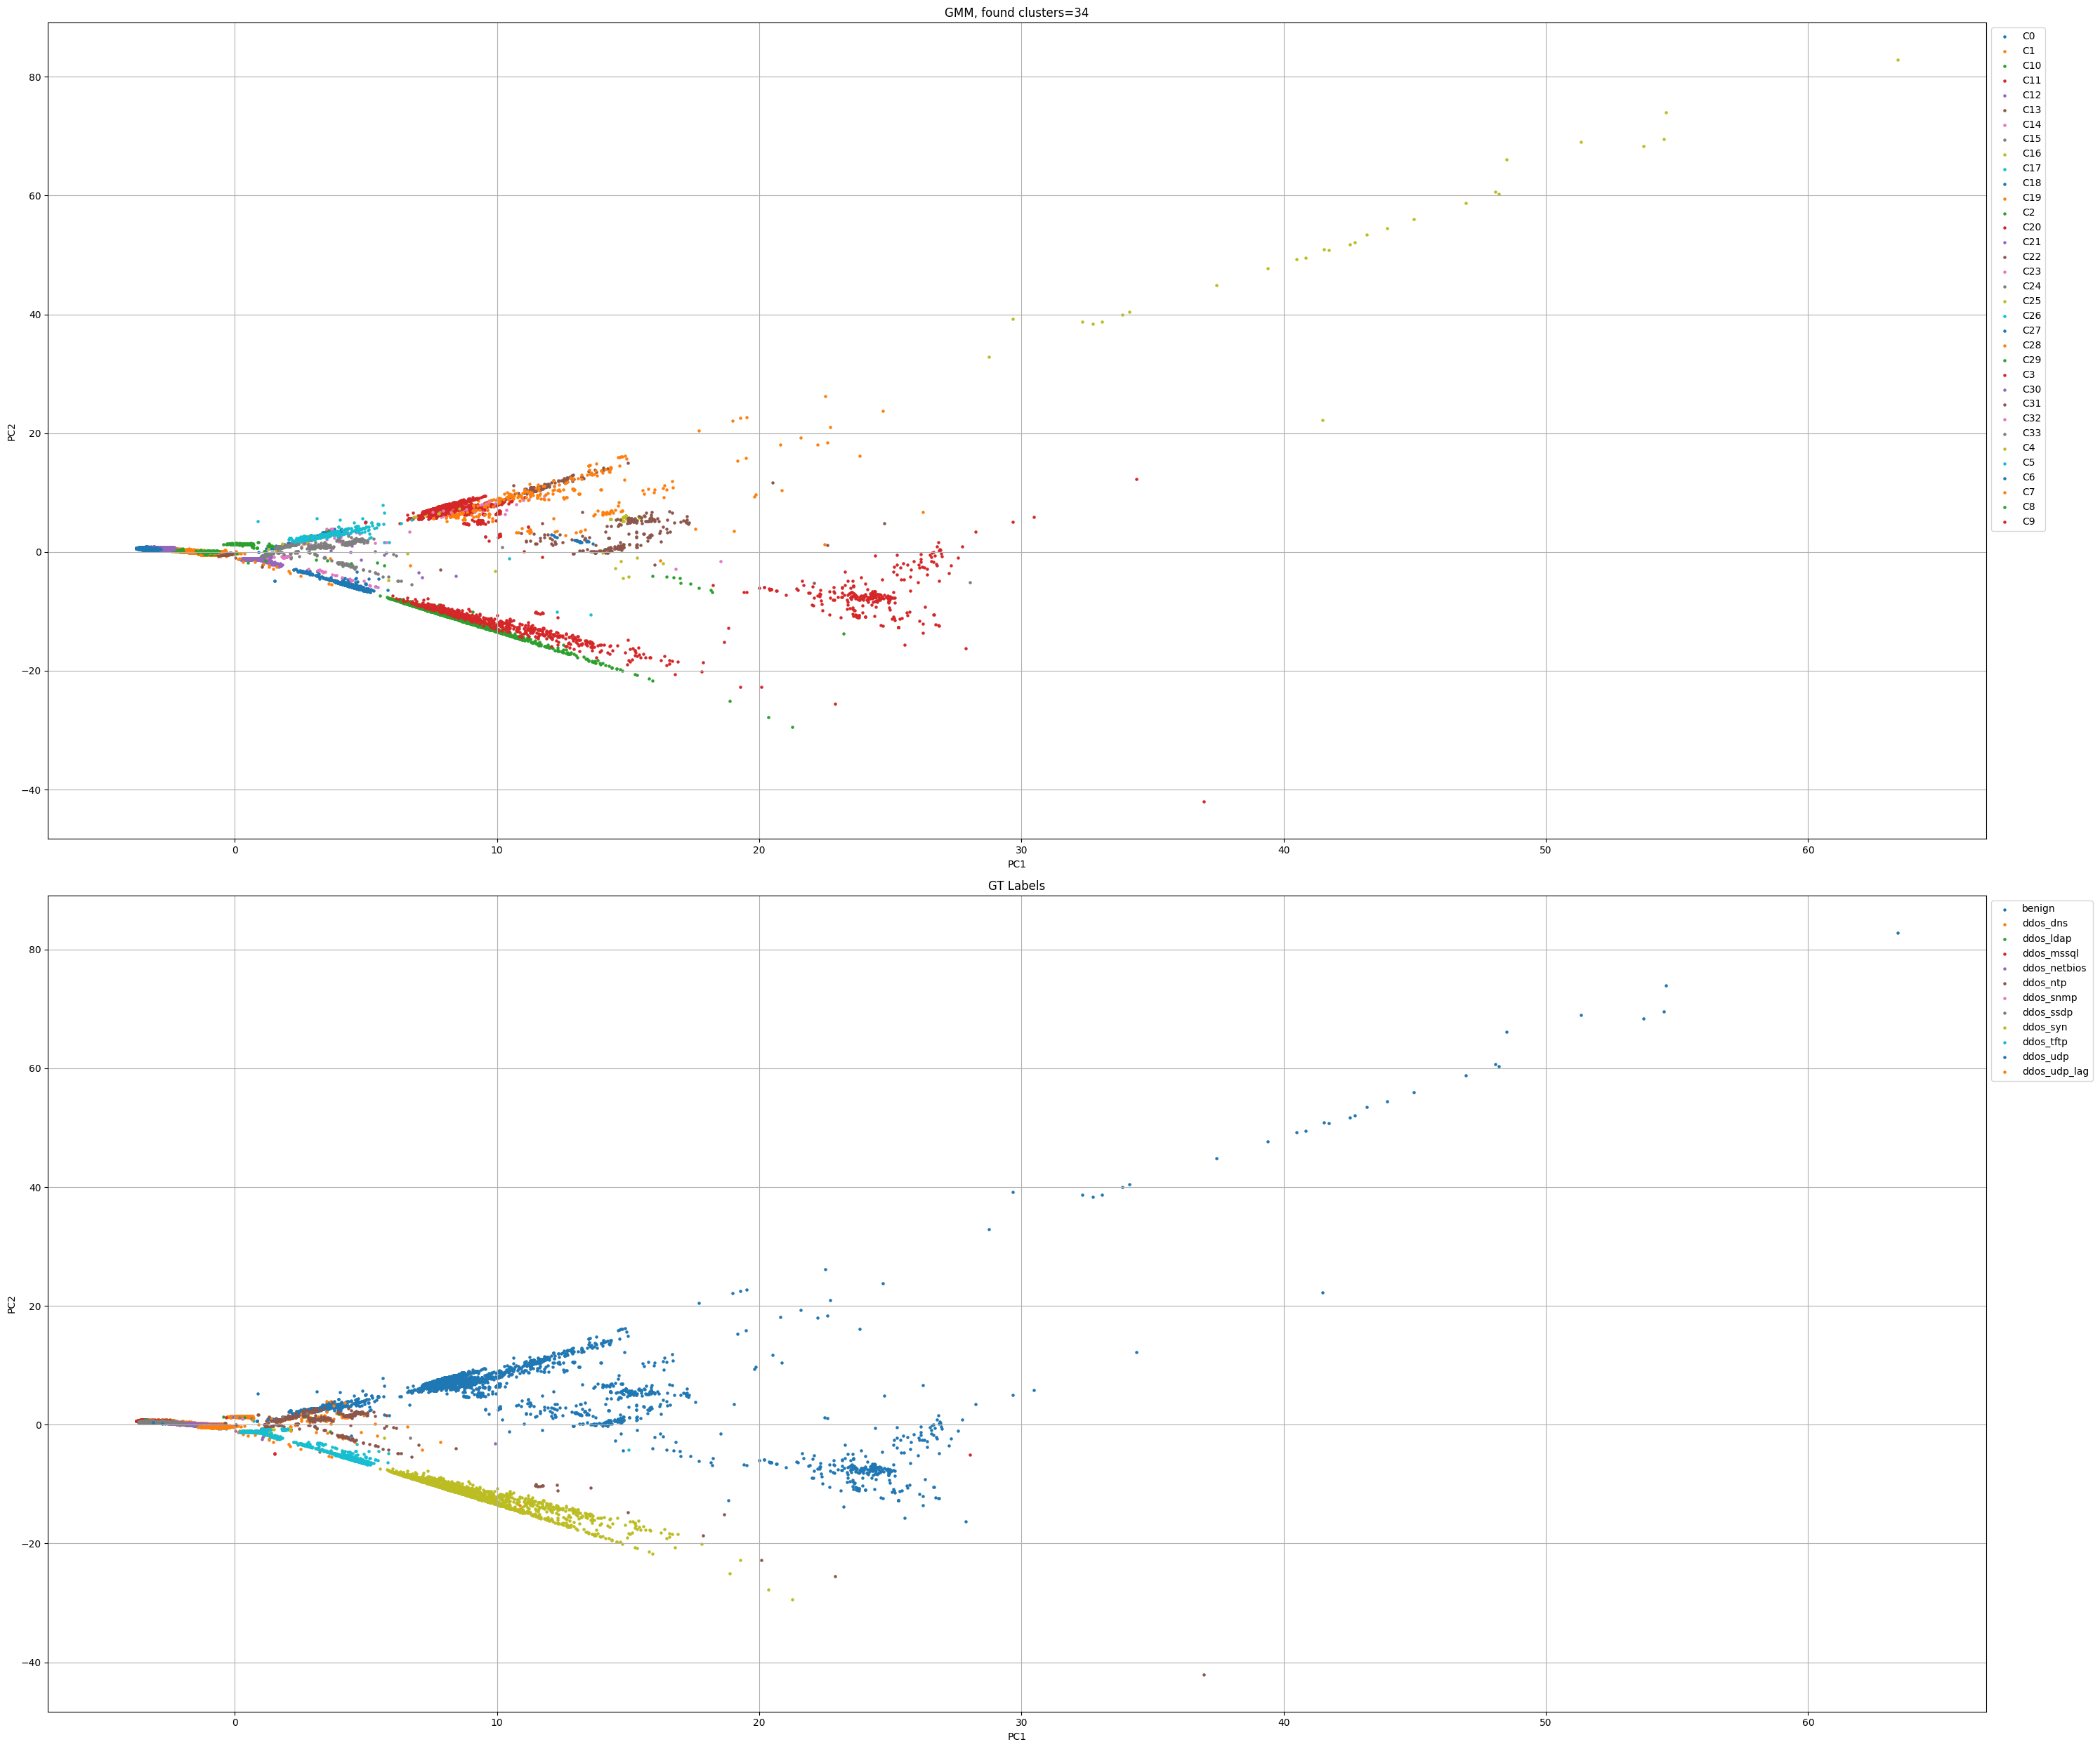

In [13]:
projection_gmm = df_pca.copy()
projection_gmm["cidBest"] = [f'C{x}' for x in cl_labels_gmm]

# print(pd.DataFrame(gmm.means_))
centri = pd.DataFrame(gmm.means_)

fig, axs = plt.subplots(2, 1, figsize=(30,25))
for i in np.unique(projection_gmm.cidBest):
# for i in ["C2","C10","C24","C15"]:
# for i in ["C24"]:
    subdf = projection_gmm[projection_gmm.cidBest==i]
    axs[0].scatter(subdf["component_1"], subdf["component_2"], label=i, s=5)
    # axs[0].scatter(centri.iloc[24][0],centri.iloc[24][1],label=i,s=20,c="Red")
axs[0].grid()
lgnd = axs[0].legend(bbox_to_anchor=(1, 1), loc="upper left")

axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')
axs[0].set_title(f'GMM, found clusters=34')

for i in np.unique(y):
# for i in ["benign"]:
    subdf = projection_gmm[projection_gmm.label==i]
    axs[1].scatter(subdf["component_1"], subdf["component_2"], label=i, s=5)
axs[1].grid()
lgnd = axs[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].set_title('GT Labels')


plt.tight_layout()
plt.show()

In [14]:
# projection_gmm[projection_gmm["cidBest"]=="C24"][["component_1","component_2","label"]]


,component_1,component_2,label
141,1.618243,0.331014,ddos_dns
397,1.841642,0.951400,ddos_dns
434,2.081509,0.938690,ddos_dns
462,1.807894,0.659143,ddos_dns
479,1.688349,0.664485,ddos_dns
...,...,...,...
58609,2.898384,2.266145,ddos_ntp
58610,3.004382,2.313548,ddos_ntp
58611,3.036576,2.292114,ddos_ntp
58612,2.953300,2.224994,ddos_ntp


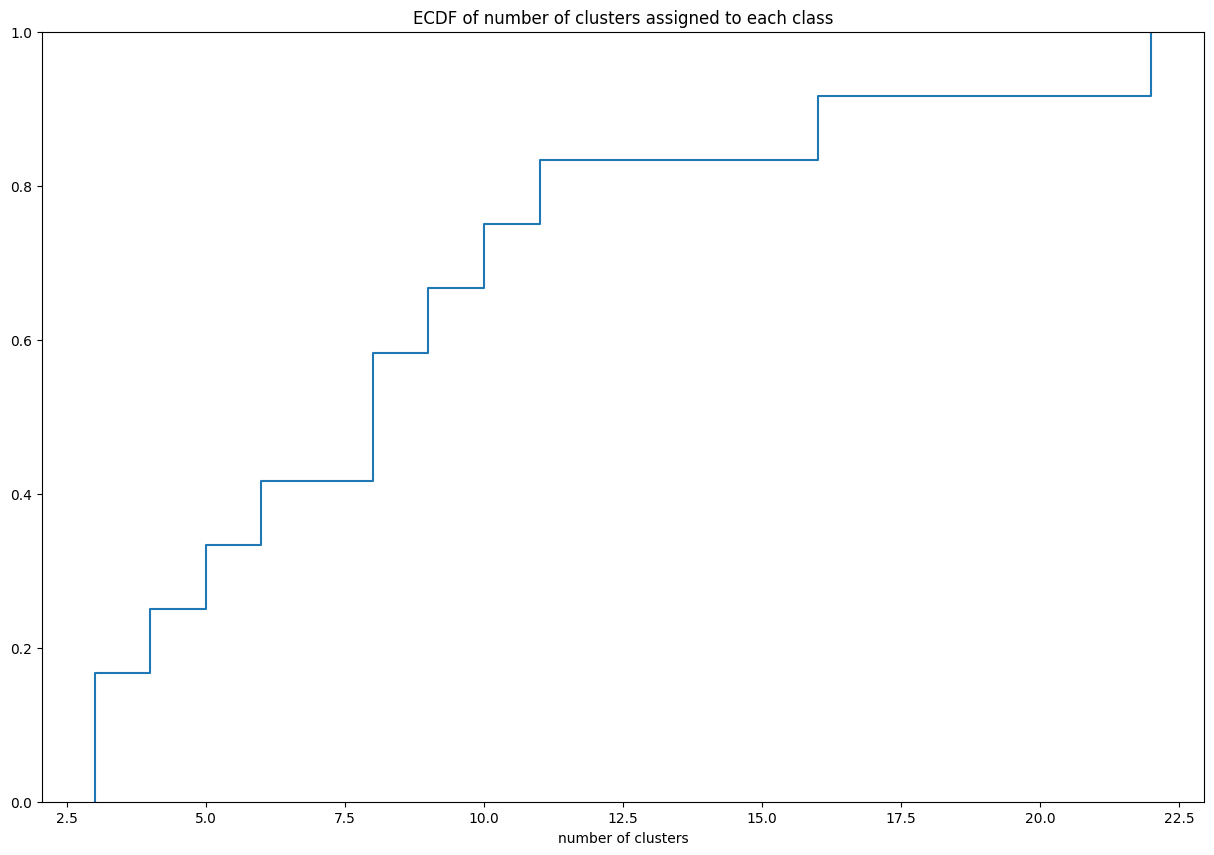

In [31]:
df_ecdf = df_pca.copy()
df_ecdf["cluster"] = cl_labels_gmm
ecdf_data=df_ecdf.groupby("label")["cluster"].nunique()
plt.figure(figsize=(15,10))
plt.ecdf(ecdf_data)
plt.xlabel("number of clusters")
plt.title("ECDF of number of clusters assigned to each class")
plt.show()


Number of clusters contained in each label

In [28]:
ecdf_data

label
benign          22
ddos_dns        16
ddos_ldap        9
ddos_mssql       8
ddos_netbios     6
ddos_ntp        11
ddos_snmp        3
ddos_ssdp       10
ddos_syn         4
ddos_tftp        8
ddos_udp         5
ddos_udp_lag     3
Name: cluster, dtype: int64

Number of labels contained in each cluster

In [33]:
labels_per_cluster = df_ecdf.groupby("cluster")["label"].nunique()

cluster
0      4
1      1
2      2
3      8
4      1
5      1
6      1
7      2
8      1
9      1
10     3
11     1
12    11
13     1
14     1
15     1
16     2
17     1
18    10
19     4
20     5
21     2
22     3
23     3
24     1
25     6
26     4
27     5
28     4
29     1
30     1
31     4
32     4
33     5
Name: label, dtype: int64